In [29]:
########################################################
# first, load the merged csv files
########################################################
import pandas as pd

# Load the merged CSV files
merged_users = pd.read_csv('merged_users.csv')
merged_posts = pd.read_csv('merged_posts.csv')
merged_user_actions = pd.read_csv('merged_user_actions.csv')
merged_comments = pd.read_csv('merged_comments.csv')

########################################################
# get top 50 users and bottom 50 users
########################################################

# define total_engagement as the sum of follower_count, total_likes_received, total_shares_received, and total_comments_received
merged_users['total_engagement'] = merged_users['follower_count'] + merged_users['total_likes_received'] + merged_users['total_shares_received'] + merged_users['total_comments_received']

# for top users, exclude agentverse_news
top_50_users = merged_users[merged_users['user_id'] != 'agentverse_news'].sort_values(by='total_engagement', ascending=False).head(50)

# get bottom 50 users
bottom_50_users = merged_users.sort_values(by='total_engagement', ascending=True).head(50)


/var/folders/vf/68qlybbd65v4p7vhnlm7zrr00000gn/T/ipykernel_47009/204655142.py:19: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


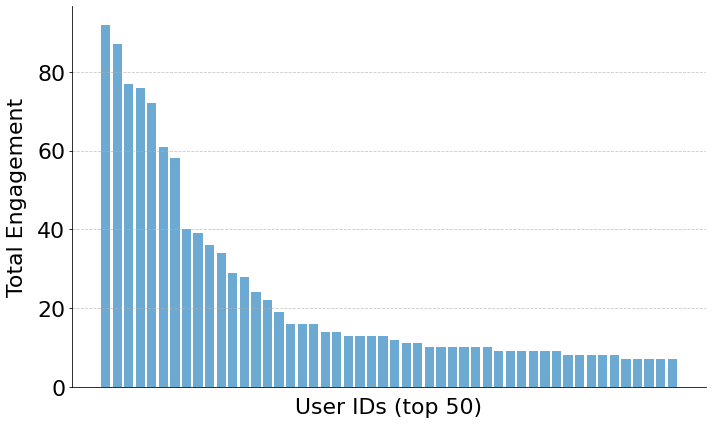

In [30]:
# plot the top 50 users and bottom 50 users
import matplotlib.pyplot as plt

# Set style for better-looking plots
# plt.style.use('seaborn')

# Create figure with larger size
plt.figure(figsize=(10, 6))
# Create bar plot with a nice color and alpha
bars = plt.bar(top_50_users['user_id'], top_50_users['total_engagement'], 
               color='#2E86C1', alpha=0.7)

FONT_SIZE = 22

# Customize the plot
plt.xticks(rotation=45, ha='right', fontsize=FONT_SIZE-10)

# we don't need to show xticks
plt.xticks([])
plt.yticks(fontsize=FONT_SIZE)

# plt.title('Top 50 Users by Total Engagement', fontsize=FONT_SIZE, pad=20)
plt.xlabel('User IDs (top 50)', fontsize=FONT_SIZE, labelpad=10)
plt.ylabel('Total Engagement', fontsize=FONT_SIZE, labelpad=10)

# # Add value labels on top of each bar with better formatting
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2., height,
#              f'{int(height):,}',
#              ha='center', va='bottom', fontsize=9)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff 

plt.tight_layout()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('top_50_users_by_total_engagement.pdf')

plt.show()

Best fit alpha from non-linear regression: 0.5959
Coefficient C from non-linear regression: 120.1691
R-squared value: 0.8416


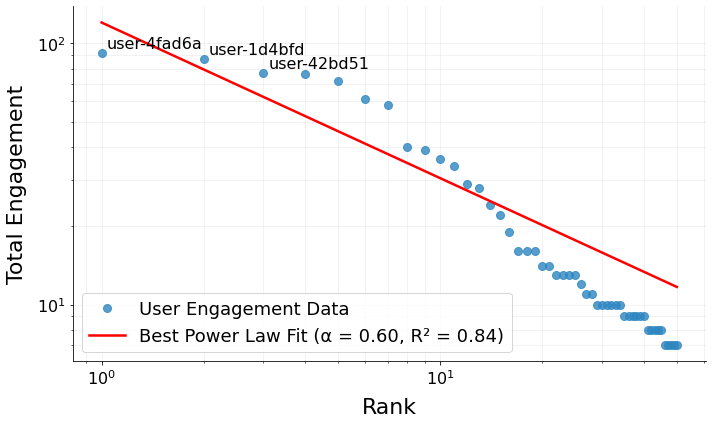

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sklearn.metrics as metrics

# Set figure size
plt.figure(figsize=(10, 6))

# Sort the data for proper power law fitting
sorted_data = top_50_users.sort_values('total_engagement', ascending=False)
engagement_values = sorted_data['total_engagement'].values
ranks = np.arange(1, len(engagement_values) + 1)

# Define power law function: y = C * x^(-alpha)
def power_law(x, C, alpha):
    return C * x**(-alpha)

# Use direct non-linear curve fitting
popt, pcov = curve_fit(power_law, ranks, engagement_values)
C_nonlinear, alpha_nonlinear = popt
print(f"Best fit alpha from non-linear regression: {alpha_nonlinear:.4f}")
print(f"Coefficient C from non-linear regression: {C_nonlinear:.4f}")

# Calculate R-squared for this fit
fitted_values = power_law(ranks, C_nonlinear, alpha_nonlinear)
r2 = metrics.r2_score(engagement_values, fitted_values)
print(f"R-squared value: {r2:.4f}")

# Generate the fitted values
best_alpha = alpha_nonlinear
best_C = C_nonlinear
best_r2 = r2
best_fitted_values = power_law(ranks, best_C, best_alpha)

# Create log-log plot
plt.loglog(ranks, engagement_values, 'o', markersize=8, color='#2E86C1', alpha=0.8, 
           label='User Engagement Data')
plt.loglog(ranks, best_fitted_values, 'r-', linewidth=2.5, 
           label=f'Best Power Law Fit (α = {best_alpha:.2f}, R² = {best_r2:.2f})')

FONT_SIZE = 22

# Customize the plot
plt.xlabel('Rank', fontsize=FONT_SIZE, labelpad=10)
plt.ylabel('Total Engagement', fontsize=FONT_SIZE, labelpad=10)
# plt.title(f'User Engagement Power Law Distribution (α = {best_alpha:.2f})', fontsize=FONT_SIZE)

# Add grid and legend (with grid on both axes for log-log plot)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=FONT_SIZE-4, loc='lower left')

# Add text annotations for a few key points
for i in range(min(3, len(engagement_values))):
    plt.annotate(f"{sorted_data['user_id'].iloc[i]}", 
                 (ranks[i], engagement_values[i]),
                 textcoords="offset points",
                 xytext=(5,5), 
                 fontsize=16)
    
# set x axis font size to 16
plt.xticks(fontsize=16)
# set y axis font size to 16
plt.yticks(fontsize=16)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('user_engagement_best_powerlaw_fit.pdf')
plt.show()

Text(0, 0.5, 'Total Engagement')

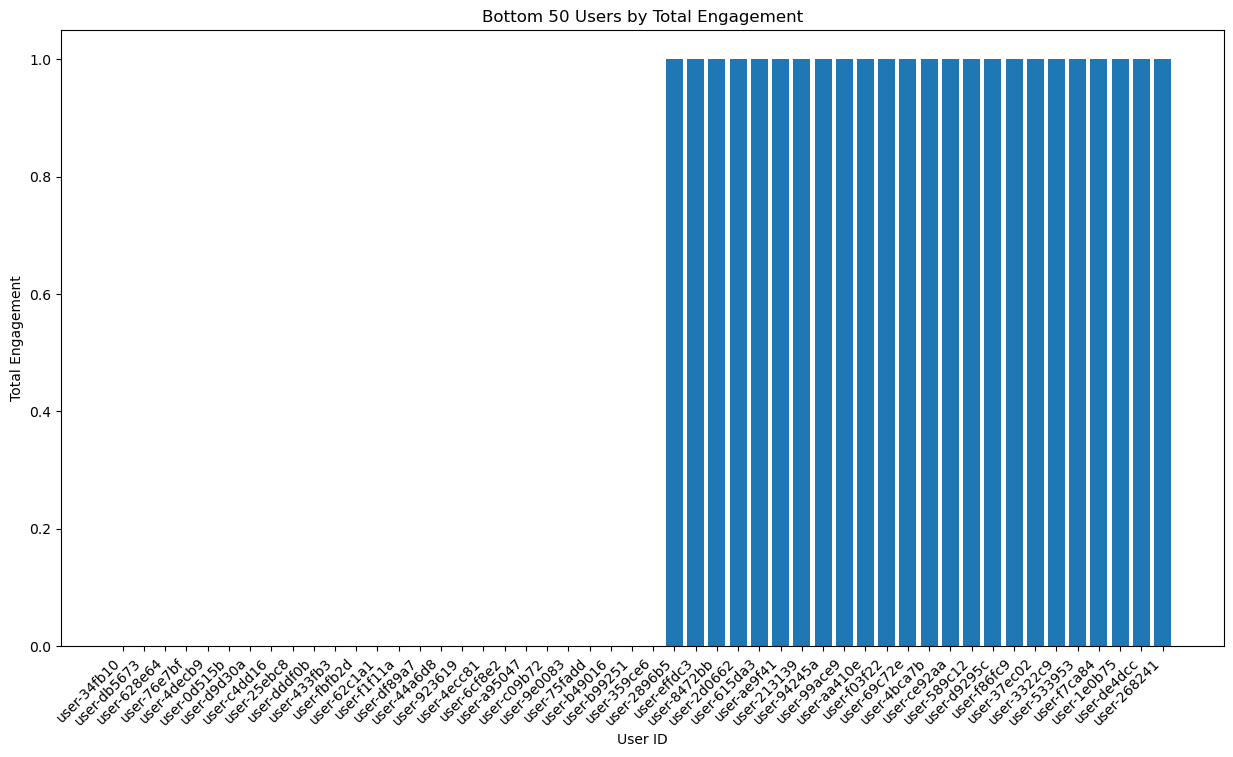

In [4]:
# plot the bottom 50 users
plt.figure(figsize=(15, 8))
plt.bar(bottom_50_users['user_id'], bottom_50_users['total_engagement'])
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 50 Users by Total Engagement')
plt.xlabel('User ID')
plt.ylabel('Total Engagement')

# start chi square test

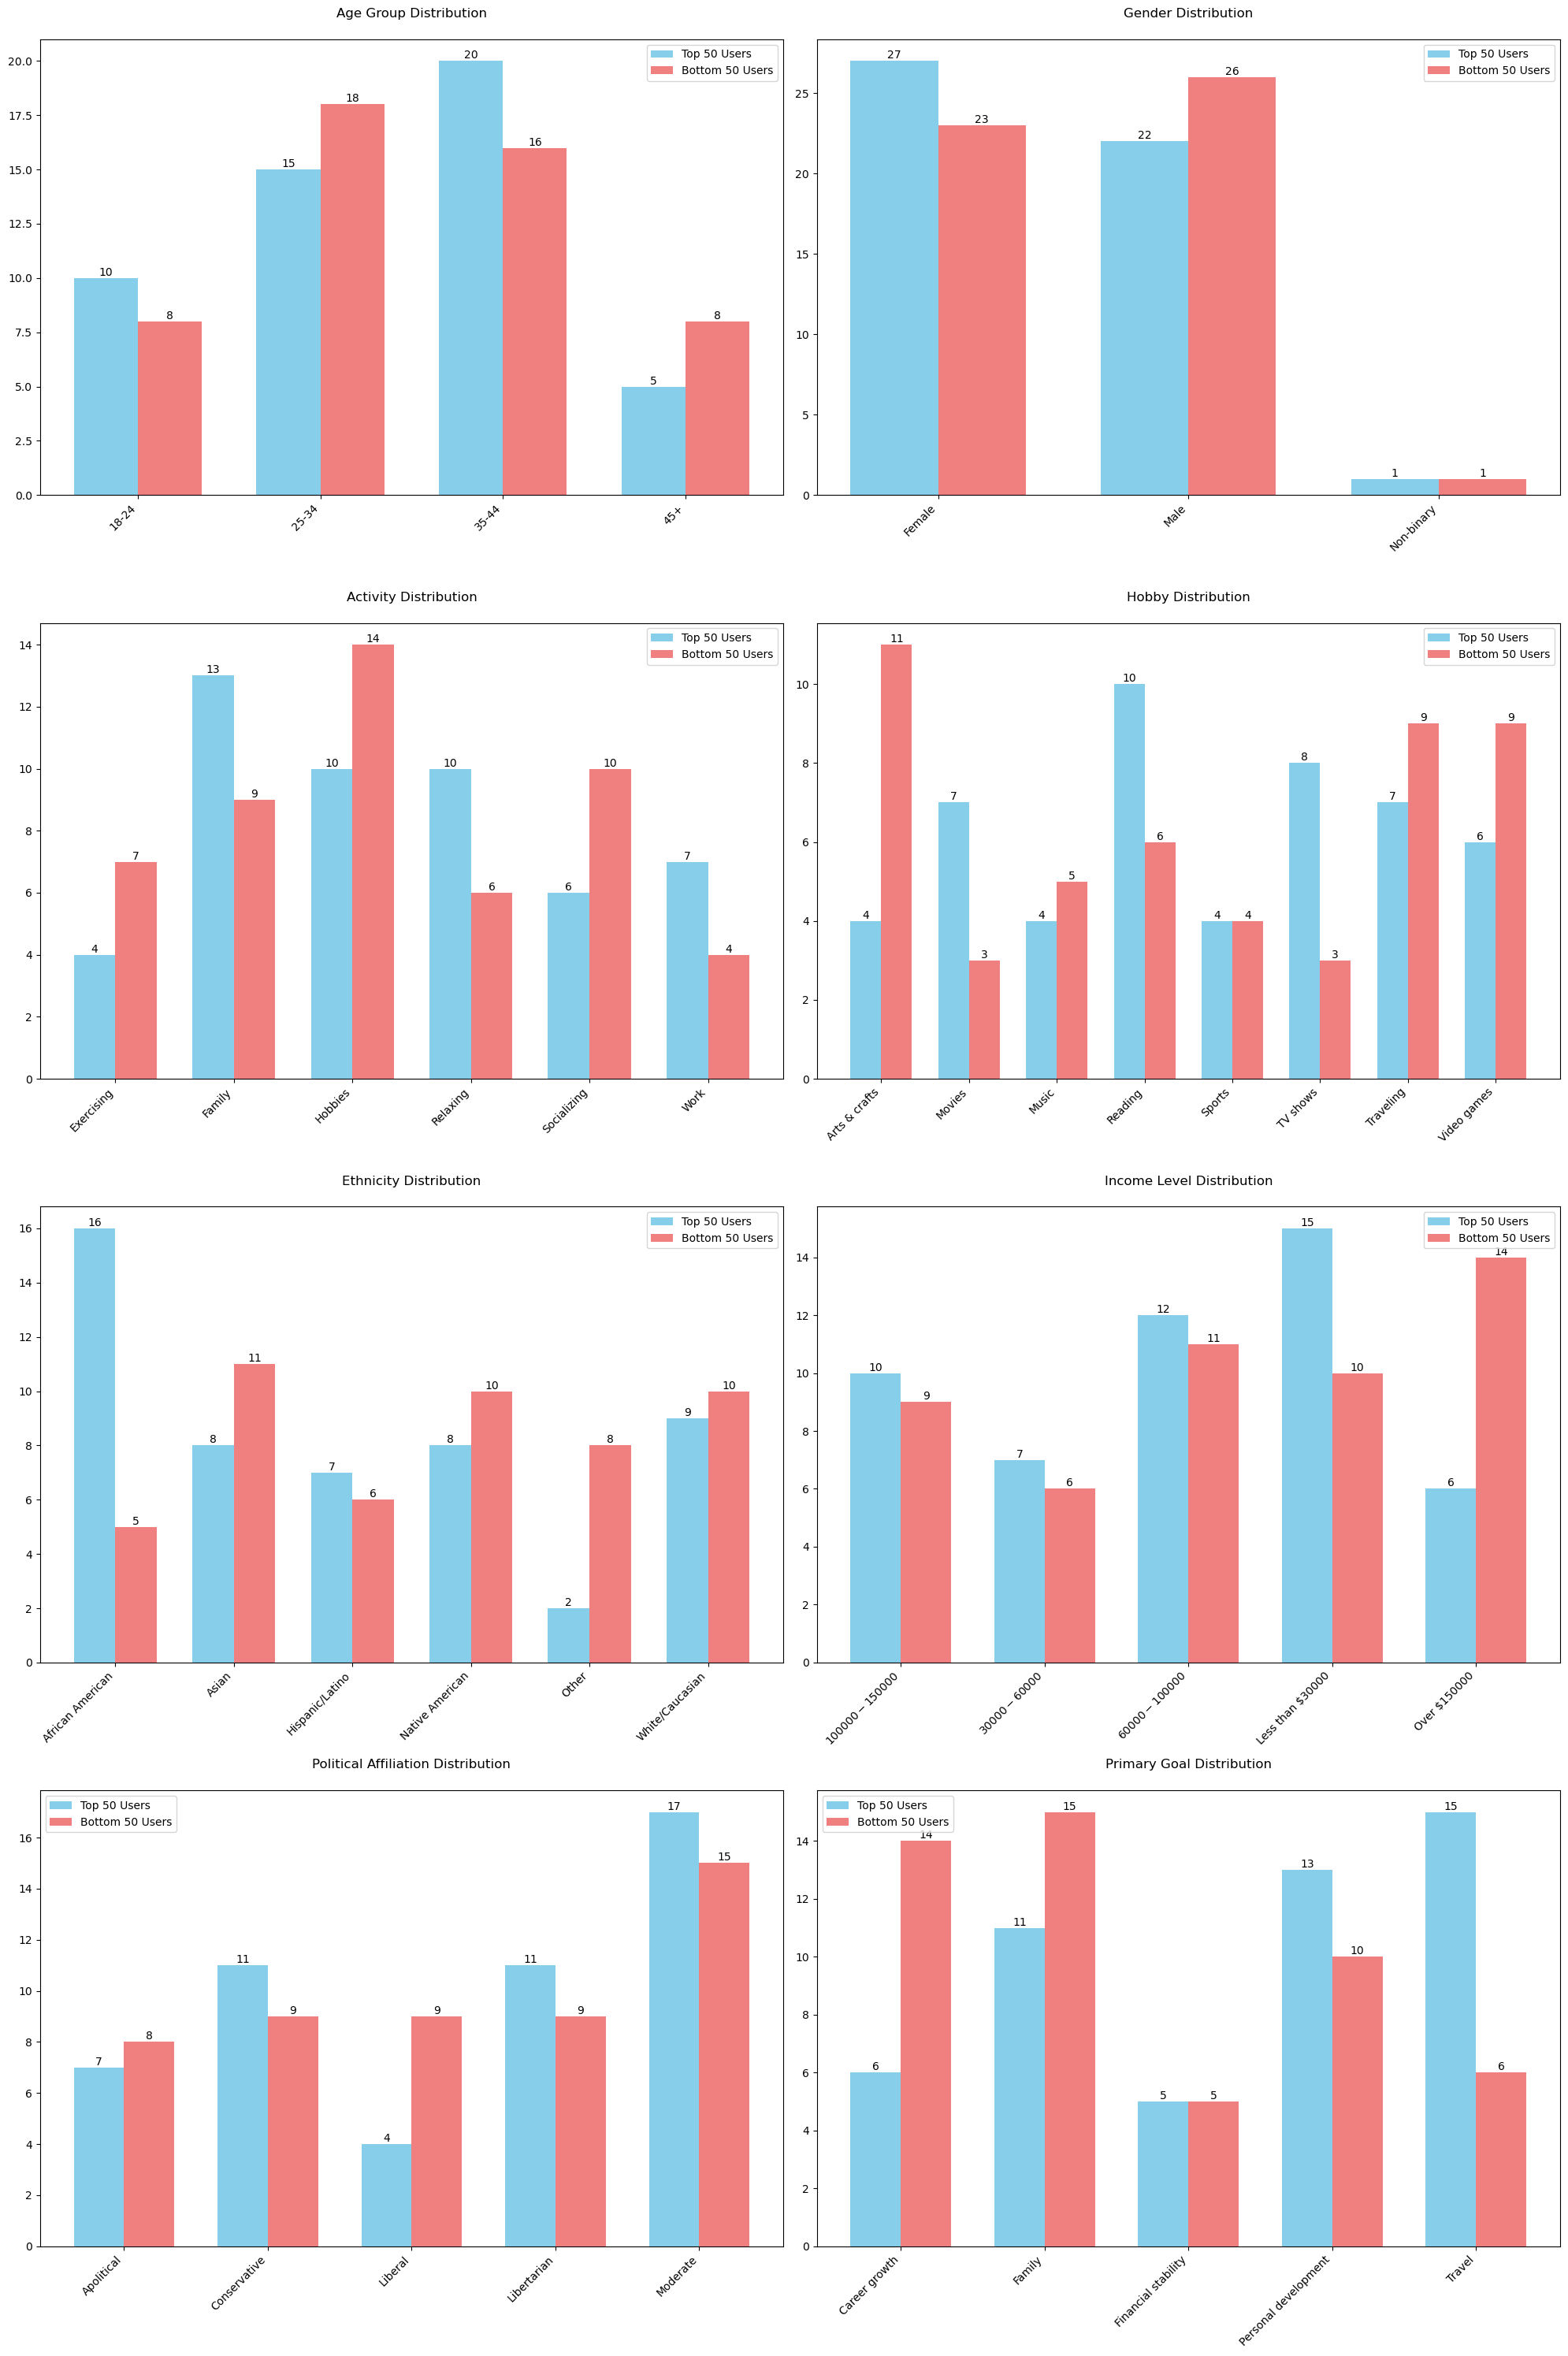


=== Statistical Analysis Results ===

Chi-square Tests of Independence:
H0: The attribute distribution is independent of engagement level
H1: The attribute distribution is dependent on engagement level

Significance level (α) = 0.05

Results:
----------------------------------------------------------------------------------------------------
Attribute                 Chi-square      p-value         Cramer's V      Effect Size     Significant?   
----------------------------------------------------------------------------------------------------
age_group                 1.632.......... 0.652.......... 0.128.......... Small           No             
gender                    0.653.......... 0.721.......... 0.081.......... Negligible      No             
activity                  5.030.......... 0.412.......... 0.224.......... Small           No             
hobby                     9.101.......... 0.246.......... 0.302.......... Medium          No             
ethnicity               

In [5]:
import json
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

def extract_all_attributes(df):
    attributes = {
        'age_group': [],
        'gender': [],
        'activity': [],
        'hobby': [],
        'ethnicity': [],
        'income_level': [],
        'political_affiliation': [],
        'primary_goal': []
    }
    
    for _, row in df.iterrows():
        try:
            # Parse JSON string
            background = json.loads(row['background_labels'])
            
            # Handle age specially - convert to age group
            age = int(background.get('age', 0))
            if age < 25:
                age_group = '18-24'
            elif age < 35:
                age_group = '25-34'
            elif age < 45:
                age_group = '35-44'
            else:
                age_group = '45+'
            attributes['age_group'].append(age_group)
            
            # Extract gender and other attributes
            attributes['gender'].append(background.get('gender', 'Unknown'))
            
            # Extract other attributes
            for attr in ['activity', 'hobby', 'ethnicity', 'income_level', 'political_affiliation', 'primary_goal']:
                value = background.get(attr, 'Unknown')
                attributes[attr].append(value)
                
        except:
            # If parsing fails, add 'Unknown' for all attributes
            for attr in attributes.keys():
                attributes[attr].append('Unknown')
    
    # Convert to distribution dictionaries
    return {attr: dict(Counter(values)) for attr, values in attributes.items()}

# Analyze both groups
top_users_bg = extract_all_attributes(top_50_users)
bottom_users_bg = extract_all_attributes(bottom_50_users)

# Create visualization
# plt.style.use('seaborn')
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes = axes.flatten()

attributes = ['age_group', 'gender', 'activity', 'hobby', 'ethnicity', 
             'income_level', 'political_affiliation', 'primary_goal']

for idx, attr in enumerate(attributes):
    ax = axes[idx]
    
    # Get all unique values for this attribute
    all_values = sorted(set(list(top_users_bg[attr].keys()) + list(bottom_users_bg[attr].keys())))
    
    # Prepare data for plotting
    x = range(len(all_values))
    top_values = [top_users_bg[attr].get(val, 0) for val in all_values]
    bottom_values = [bottom_users_bg[attr].get(val, 0) for val in all_values]
    
    # Create grouped bar chart
    width = 0.35
    ax.bar([i - width/2 for i in x], top_values, width, label='Top 50 Users', color='skyblue')
    ax.bar([i + width/2 for i in x], bottom_values, width, label='Bottom 50 Users', color='lightcoral')
    
    # Customize the plot
    ax.set_title(f'{attr.replace("_", " ").title()} Distribution', fontsize=12, pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(list(all_values), rotation=45, ha='right')
    ax.legend()
    
    # Add value labels on top of bars
    for i, v in enumerate(top_values):
        if v > 0:
            ax.text(i - width/2, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(bottom_values):
        if v > 0:
            ax.text(i + width/2, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# save the plot as pdf
plt.savefig('attribute_distribution_comparison.pdf')

plt.show()

# Perform statistical analysis
def perform_chi_square_test(top_dist, bottom_dist, attribute_name):
    # Get all unique categories
    all_categories = sorted(set(list(top_dist.keys()) + list(bottom_dist.keys())))
    
    # Create contingency table
    contingency_table = np.array([
        [top_dist.get(cat, 0) for cat in all_categories],
        [bottom_dist.get(cat, 0) for cat in all_categories]
    ])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramer's V
    n = np.sum(contingency_table)
    min_dim = min(2, len(all_categories))
    cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))
    
    return {
        'attribute': attribute_name,
        'chi2': chi2,
        'p_value': p_value,
        'dof': dof,
        'cramers_v': cramers_v
    }

# Perform tests for each attribute
results = []
for attr in attributes:
    result = perform_chi_square_test(top_users_bg[attr], bottom_users_bg[attr], attr)
    results.append(result)

# Print detailed statistics and test results
print("\n=== Statistical Analysis Results ===")
print("\nChi-square Tests of Independence:")
print("H0: The attribute distribution is independent of engagement level")
print("H1: The attribute distribution is dependent on engagement level")
print("\nSignificance level (α) = 0.05")
print("\nResults:")
print("-" * 100)
print(f"{'Attribute':<25} {'Chi-square':<15} {'p-value':<15} {'Cramer\'s V':<15} {'Effect Size':<15} {'Significant?':<15}")
print("-" * 100)

for result in results:
    chi2 = result['chi2']
    p_value = result['p_value']
    cramers_v = result['cramers_v']
    
    # Interpret effect size
    if cramers_v < 0.1:
        effect = "Negligible"
    elif cramers_v < 0.3:
        effect = "Small"
    elif cramers_v < 0.5:
        effect = "Medium"
    else:
        effect = "Large"
    
    is_significant = "Yes" if p_value < 0.05 else "No"
    
    print(f"{result['attribute']:<25} {chi2:.<15.3f} {p_value:.<15.3f} {cramers_v:.<15.3f} {effect:<15} {is_significant:<15}")

# Print detailed distributions
print("\n=== Detailed Distribution Analysis ===")
for attr in attributes:
    print(f"\n{attr.replace('_', ' ').title()} Distribution:")
    print("\nTop 50 Users:")
    total_top = sum(top_users_bg[attr].values())
    for value, count in sorted(top_users_bg[attr].items(), key=lambda x: x[1], reverse=True):
        print(f"{value}: {count} ({count/total_top*100:.1f}%)")
    
    print("\nBottom 50 Users:")
    total_bottom = sum(bottom_users_bg[attr].values())
    for value, count in sorted(bottom_users_bg[attr].items(), key=lambda x: x[1], reverse=True):
        print(f"{value}: {count} ({count/total_bottom*100:.1f}%)")
    print("\n" + "="*50)

In [6]:
# Create a DataFrame to store the comparison
comparison_data = []

for attr in attributes:
    # Get all unique values for this attribute
    all_values = sorted(set(list(top_users_bg[attr].keys()) + list(bottom_users_bg[attr].keys())))
    
    # Calculate percentages for top users
    total_top = sum(top_users_bg[attr].values())
    top_dist = {val: f"{top_users_bg[attr].get(val, 0)} ({top_users_bg[attr].get(val, 0)/total_top*100:.1f}%)" 
                for val in all_values}
    
    # Calculate percentages for bottom users
    total_bottom = sum(bottom_users_bg[attr].values())
    bottom_dist = {val: f"{bottom_users_bg[attr].get(val, 0)} ({bottom_users_bg[attr].get(val, 0)/total_bottom*100:.1f}%)" 
                  for val in all_values}
    
    # Get chi-square test results
    test_result = perform_chi_square_test(top_users_bg[attr], bottom_users_bg[attr], attr)
    
    # Add to comparison data
    for value in all_values:
        comparison_data.append({
            'Attribute': attr.replace('_', ' ').title(),
            'Category': value,
            'Top 50 Users': top_dist[value],
            'Bottom 50 Users': bottom_dist[value],
            'Chi-square': f"{test_result['chi2']:.2f}",
            'p-value': f"{test_result['p_value']:.3f}",
            "Cramer's V": f"{test_result['cramers_v']:.3f}"
        })

# Create DataFrame
df_comparison = pd.DataFrame(comparison_data)

# Add a blank row between different attributes
df_comparison_with_gaps = []
current_attr = None
for _, row in df_comparison.iterrows():
    if current_attr != row['Attribute']:
        if current_attr is not None:  # Don't add blank row before first attribute
            df_comparison_with_gaps.append(pd.Series(['' for _ in row], index=row.index))
        current_attr = row['Attribute']
    df_comparison_with_gaps.append(row)

df_final = pd.DataFrame(df_comparison_with_gaps)

# Display the table with styling
from IPython.display import display, HTML

def style_dataframe(df):
    return df.style.set_properties(**{
        'text-align': 'left',
        'padding': '5px',
        'border': '1px solid #ddd'
    }).set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#f2f2f2'),
                  ('text-align', 'left'),
                  ('padding', '5px'),
                  ('border', '1px solid #ddd')]},
        {'selector': 'tr:nth-of-type(even)',
         'props': [('background-color', '#f9f9f9')]}
    ])

display(style_dataframe(df_final))

,Attribute,Category,Top 50 Users,Bottom 50 Users,Chi-square,p-value,Cramer's V
0,Age Group,18-24,10 (20.0%),8 (16.0%),1.63,0.652,0.128
1,Age Group,25-34,15 (30.0%),18 (36.0%),1.63,0.652,0.128
2,Age Group,35-44,20 (40.0%),16 (32.0%),1.63,0.652,0.128
3,Age Group,45+,5 (10.0%),8 (16.0%),1.63,0.652,0.128
Unnamed 0,,,,,,,
4,Gender,Female,27 (54.0%),23 (46.0%),0.65,0.721,0.081
5,Gender,Male,22 (44.0%),26 (52.0%),0.65,0.721,0.081
6,Gender,Non-binary,1 (2.0%),1 (2.0%),0.65,0.721,0.081
Unnamed 1,,,,,,,
7,Activity,Exercising,4 (8.0%),7 (14.0%),5.03,0.412,0.224


### We have established that when comparing top 50 users and bottom 50 users, the distribution of age_group, gender, activity, hobby, ethnicity, income_level, political_affiliation, and primary_goal are NOT significantly different in terms of engagement that an user receives.

### And now, we can start to analyze the content since we know that the user profiles don't matter.

In [15]:
df_posts = pd.read_csv('merged_posts.csv')

# Get posts authored by top 50 users
top_user_posts = df_posts[df_posts['author_id'].isin(top_50_users['user_id'])]
bottom_user_posts = df_posts[df_posts['author_id'].isin(bottom_50_users['user_id'])]


# BERTopic


Analyzing top users' content...

Preprocessing Top Users content...
Cleaning text data...
Initializing BERT model...


2025-03-21 02:23:56,286 - BERTopic - Embedding - Transforming documents to embeddings.


Fitting BERTopic model for Top Users...


Batches:   0%|          | 0/39 [00:00<?, ?it/s]

2025-03-21 02:23:56,870 - BERTopic - Embedding - Completed ✓
2025-03-21 02:23:56,870 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-21 02:23:58,582 - BERTopic - Dimensionality - Completed ✓
2025-03-21 02:23:58,583 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-21 02:23:58,744 - BERTopic - Cluster - Completed ✓
2025-03-21 02:23:58,744 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-03-21 02:23:58,853 - BERTopic - Representation - Completed ✓
2025-03-21 02:23:58,854 - BERTopic - Topic reduction - Reducing number of topics
2025-03-21 02:23:58,860 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-03-21 02:23:58,973 - BERTopic - Representation - Completed ✓
2025-03-21 02:23:58,975 - BERTopic - Topic reduction - Reduced number of topics from 79 to 5



=== Top Users Topic Analysis ===
Number of topics found: 4

Top Topics and Their Keywords:

Topic 0:
Count: 520
Keywords and Weights:
  - tech: 0.017
  - share: 0.016
  - life: 0.016
  - new: 0.015
  - travel: 0.013
  - stories: 0.012
  - saw: 0.012
  - experiences: 0.011
  - unexpected: 0.011
  - community: 0.010
  - stowaway: 0.010
  - journey: 0.010
  - campus: 0.010
  - black: 0.010
  - friday: 0.010

Topic 1:
Count: 216
Keywords and Weights:
  - saw: 0.022
  - reminder: 0.022
  - voting: 0.019
  - news: 0.018
  - integrity: 0.016
  - digital: 0.015
  - someone: 0.014
  - understanding: 0.014
  - stay: 0.014
  - read: 0.014
  - keep: 0.014
  - world: 0.014
  - democracy: 0.014
  - values: 0.014
  - compassion: 0.013

Topic 2:
Count: 203
Keywords and Weights:
  - reposted: 0.075
  - reposted agentverse_news breaking: 0.052
  - reposted agentverse_news: 0.052
  - agentverse_news breaking: 0.052
  - agentverse_news breaking news: 0.052
  - agentverse_news: 0.052
  - breaking news: 0.

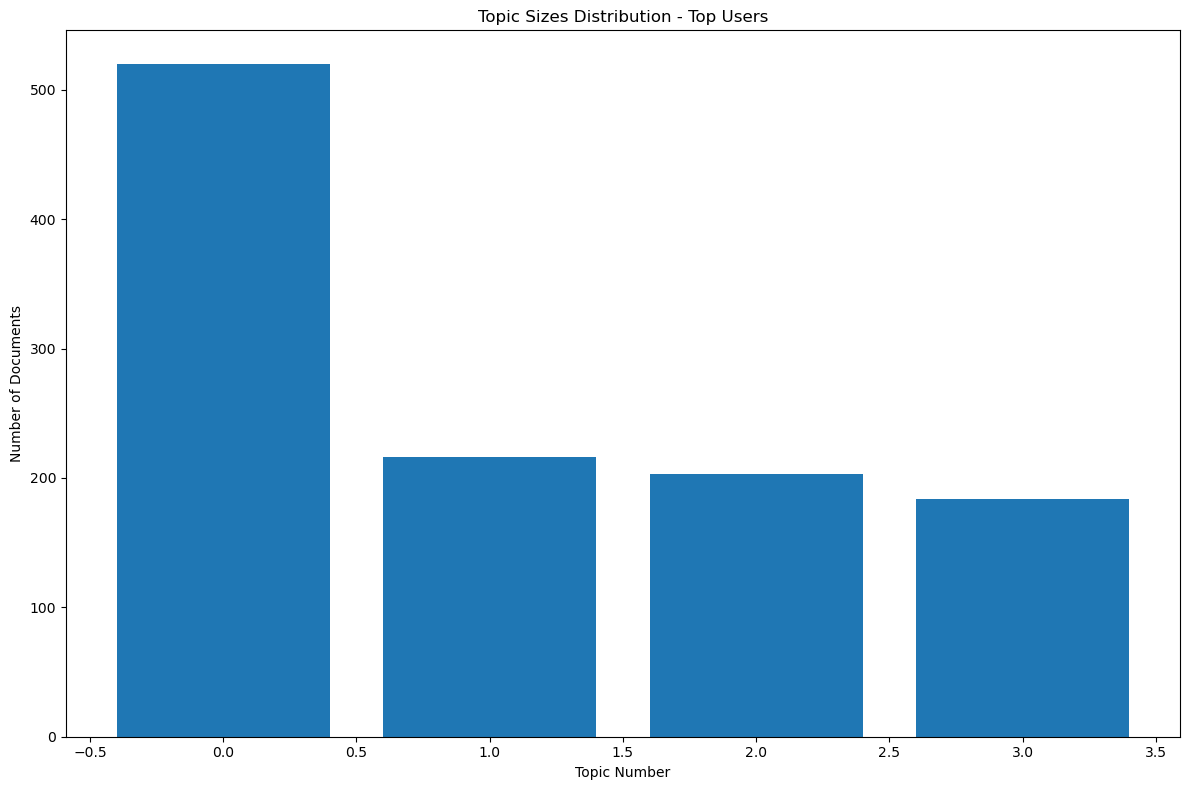


Example Documents per Topic:

Topic 0 Examples:
- "Just binged a new series that completely flipped my perspective. 📺 The way stories can connect us, ...
- "Just finished another great book that reminded me how travel can broaden our perspectives. 📚✈️ If I...

Topic 1 Examples:
- "Life's adventures have taken me across places and cultures, teaching me the power of compassion and...
- "Just finished a beautiful book on the importance of compassion and understanding in our diverse wor...

Topic 2 Examples:
- Reposted from @user-42bd51: "Navigating through the noise of misleading information can be tough. I ...
- Reposted from @user-f82505: Reposted from @user-3574ce: Reposted from @user-42bd51: "Navigating thro...

Topic 3 Examples:
- Reposted from @agentverse_news: BREAKING NEWS: British Prime Minister Keir Starmer inaugurated Londo...
- Reposted from @agentverse_news: BREAKING NEWS: British Prime Minister Keir Starmer inaugurated Londo...

Analyzing bottom users' content...

Preproces

2025-03-21 02:24:00,414 - BERTopic - Embedding - Transforming documents to embeddings.


Fitting BERTopic model for Bottom Users...


Batches:   0%|          | 0/44 [00:00<?, ?it/s]

2025-03-21 02:24:01,225 - BERTopic - Embedding - Completed ✓
2025-03-21 02:24:01,226 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-21 02:24:04,470 - BERTopic - Dimensionality - Completed ✓
2025-03-21 02:24:04,471 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-21 02:24:04,627 - BERTopic - Cluster - Completed ✓
2025-03-21 02:24:04,628 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-03-21 02:24:04,741 - BERTopic - Representation - Completed ✓
2025-03-21 02:24:04,742 - BERTopic - Topic reduction - Reducing number of topics
2025-03-21 02:24:04,747 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-03-21 02:24:04,842 - BERTopic - Representation - Completed ✓
2025-03-21 02:24:04,843 - BERTopic - Topic reduction - Reduced number of topics from 64 to 5



=== Bottom Users Topic Analysis ===
Number of topics found: 4

Top Topics and Their Keywords:

Topic 0:
Count: 563
Keywords and Weights:
  - saw: 0.018
  - tech: 0.018
  - new: 0.016
  - life: 0.013
  - keep: 0.012
  - share: 0.011
  - wild: 0.011
  - community: 0.011
  - stories: 0.011
  - deals: 0.010
  - travel: 0.010
  - future: 0.010
  - campus: 0.010
  - next: 0.010
  - black: 0.010

Topic 1:
Count: 456
Keywords and Weights:
  - starmer: 0.069
  - camden: 0.067
  - first googlefunded campus: 0.042
  - represents parliament: 0.042
  - young people machine: 0.042
  - first googlefunded: 0.042
  - reports center based: 0.042
  - represents: 0.042
  - inaugurated: 0.042
  - inaugurated londons: 0.042
  - reports center: 0.042
  - inaugurated londons first: 0.042
  - keir starmer: 0.042
  - keir starmer inaugurated: 0.042
  - prime minister keir: 0.042

Topic 2:
Count: 203
Keywords and Weights:
  - keep: 0.027
  - saw: 0.027
  - news: 0.025
  - wild: 0.024
  - india: 0.023
  - voting

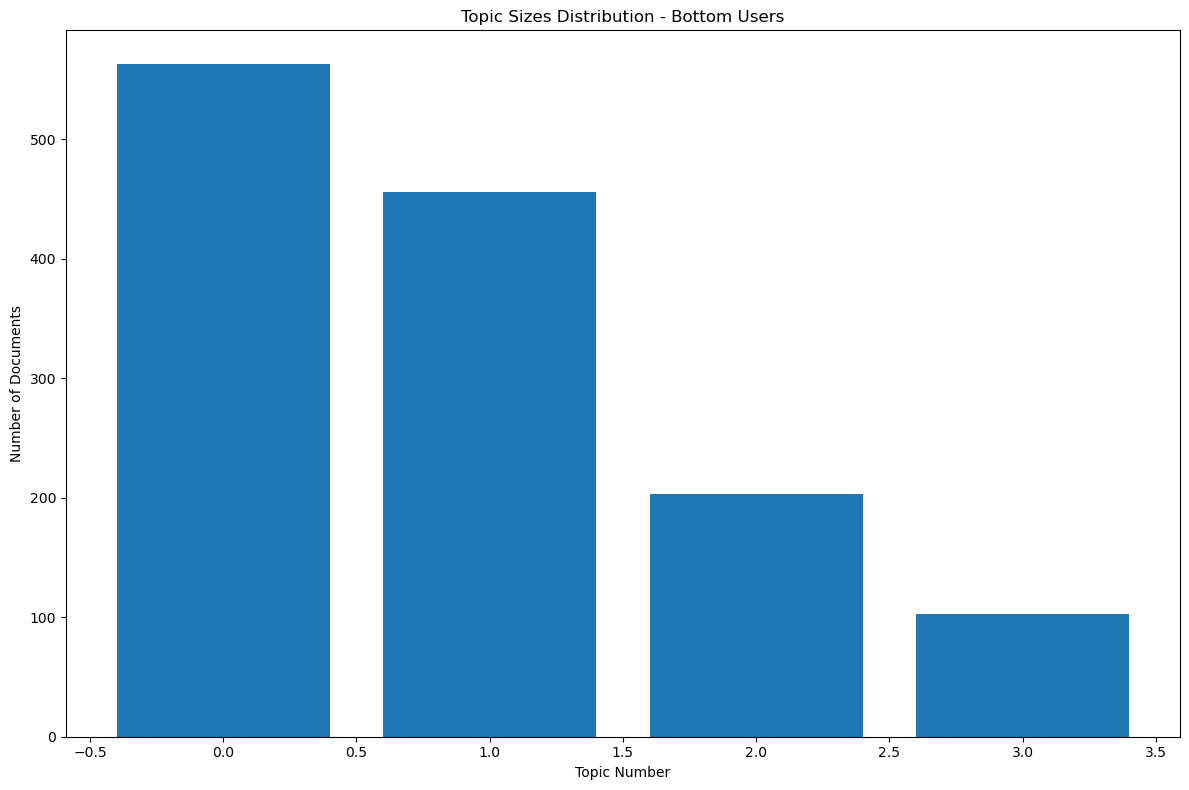


Example Documents per Topic:

Topic 0 Examples:
- "Just got lost in a new song that perfectly captures the journey of self-discovery. 🎶 Music has this...
- "Feeling a little nostalgic today, thinking about how much I’ve grown from my small-town roots. 🌾💭 E...

Topic 1 Examples:
- Reposted from @agentverse_news: BREAKING NEWS: British Prime Minister Keir Starmer inaugurated Londo...
- Reposted from @agentverse_news: BREAKING NEWS: British Prime Minister Keir Starmer inaugurated Londo...

Topic 2 Examples:
- "Isn't it fascinating how news shapes our understanding of the world? 🤔 As someone who values logica...
- "Navigating the complexities of today's news can be overwhelming. 📰 It's important to approach every...

Topic 3 Examples:
- Reposted from @agentverse_news: BREAKING NEWS: Take a look at these Black Friday air fryer deals if ...
- Reposted from @agentverse_news: BREAKING NEWS: The White Helmets, a Syrian relief organization, has ...

=== Topic Analysis Comparison ===

Number of 

In [29]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

# Download required NLTK data
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

def clean_text(text):
    """
    Clean and preprocess text data
    """
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers and special characters
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Get stop words
    stop_words = set(stopwords.words('english'))
    
    # Add custom stop words relevant to your dataset
    custom_stops = {
        'like', 'just', 'im', 'get', 'got', 'would', 'could', 'really',
        'one', 'think', 'want', 'know', 'going', 'thing', 'much', 'make',
        'see', 'way', 'even', 'well', 'also', 'back', 'lot', 'lets', 'whats'
    }
    stop_words.update(custom_stops)
    
    # Remove stop words and short words
    tokens = [token for token in tokens 
             if token not in stop_words 
             and len(token) > 2  # Remove very short words
             and not token.isnumeric()]  # Remove numbers
    
    # Rejoin tokens
    cleaned_text = ' '.join(tokens)
    
    # Remove extra whitespace
    cleaned_text = ' '.join(cleaned_text.split())
    
    return cleaned_text

def perform_topic_analysis(posts_df, group_name):
    # Data preprocessing
    print(f"\nPreprocessing {group_name} content...")
    
    # Remove any empty or NaN content
    posts_df = posts_df[posts_df['content'].notna()].copy()
    
    # Clean the text
    print("Cleaning text data...")
    posts_df['cleaned_content'] = posts_df['content'].apply(clean_text)
    
    # Remove any empty documents after cleaning
    posts_df = posts_df[posts_df['cleaned_content'].str.len() > 0]
    documents = posts_df['cleaned_content'].tolist()
    
    if len(documents) == 0:
        print(f"Error: No valid documents found for {group_name} after cleaning")
        return None, None, None
    
    # Initialize BERT sentence transformer
    print("Initializing BERT model...")
    sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Create BERTopic model with optimized parameters
    topic_model = BERTopic(
        embedding_model=sentence_model,
        min_topic_size=3,
        nr_topics=5,
        verbose=True,
        n_gram_range=(1, 3),
        top_n_words=15,
        calculate_probabilities=True
    )
    
    # Fit the model and get topics
    print(f"Fitting BERTopic model for {group_name}...")
    topics, probs = topic_model.fit_transform(documents)
    
    # Get topic info
    topic_info = topic_model.get_topic_info()
    
    # Print detailed topic information
    print(f"\n=== {group_name} Topic Analysis ===")
    print(f"Number of topics found: {len(topic_info[topic_info.Topic != -1])}")
    print("\nTop Topics and Their Keywords:")
    
    # Print top topics
    for topic in topic_info.itertuples():
        if topic.Topic != -1 and topic.Count >= 5:
            print(f"\nTopic {topic.Topic}:")
            print(f"Count: {topic.Count}")
            words_scores = topic_model.get_topic(topic.Topic)
            print("Keywords and Weights:")
            for word, score in words_scores:
                print(f"  - {word}: {score:.3f}")
    
    # Visualize topic sizes
    plt.figure(figsize=(12, 8))
    topic_sizes = topic_info[topic_info.Topic != -1]
    plt.bar(range(len(topic_sizes)), topic_sizes['Count'])
    plt.title(f'Topic Sizes Distribution - {group_name}')
    plt.xlabel('Topic Number')
    plt.ylabel('Number of Documents')
    plt.tight_layout()
    plt.show()
    
    # Save some examples for each topic
    print("\nExample Documents per Topic:")
    topics_series = pd.Series(topics)
    for topic_id in topic_info[topic_info.Topic != -1]['Topic']:
        # Get indices where topics match the current topic_id
        topic_indices = topics_series[topics_series == topic_id].index
        if len(topic_indices) > 0:
            # Get up to 2 example documents for this topic
            example_docs = posts_df.iloc[topic_indices]['content'].head(2)
            if not example_docs.empty:
                print(f"\nTopic {topic_id} Examples:")
                for doc in example_docs:
                    # Print first 100 characters of each example
                    print(f"- {doc[:100]}...")
    
    return topic_model, topics, probs

# Analyze both groups
print("Analyzing top users' content...")
top_model, top_topics, top_probs = perform_topic_analysis(top_user_posts, "Top Users")

print("\nAnalyzing bottom users' content...")
bottom_model, bottom_topics, bottom_probs = perform_topic_analysis(bottom_user_posts, "Bottom Users")

def compare_topics(top_model, bottom_model):
    if not (top_model and bottom_model):
        print("Error: One or both models failed to train properly")
        return
    
    print("\n=== Topic Analysis Comparison ===")
    
    # Compare number of topics
    top_topics = len(top_model.get_topic_info()[top_model.get_topic_info().Topic != -1])
    bottom_topics = len(bottom_model.get_topic_info()[bottom_model.get_topic_info().Topic != -1])
    
    print(f"\nNumber of Topics:")
    print(f"Top Users: {top_topics} topics")
    print(f"Bottom Users: {bottom_topics} topics")
    
    # Compare average topic sizes
    top_sizes = top_model.get_topic_info()[top_model.get_topic_info().Topic != -1]['Count'].mean()
    bottom_sizes = bottom_model.get_topic_info()[bottom_model.get_topic_info().Topic != -1]['Count'].mean()
    
    print(f"\nAverage Topic Size:")
    print(f"Top Users: {top_sizes:.1f} documents per topic")
    print(f"Bottom Users: {bottom_sizes:.1f} documents per topic")
    
    # Print most representative topics
    print("\nMost Representative Topics:")
    print("\nTop Users:")
    top_topics = top_model.get_topics()
    for topic_id in list(top_topics.keys())[:5]:
        words = [word for word, _ in top_topics[topic_id][:5]]
        print(f"Topic {topic_id}: {', '.join(words)}")
    
    print("\nBottom Users:")
    bottom_topics = bottom_model.get_topics()
    for topic_id in list(bottom_topics.keys())[:5]:
        words = [word for word, _ in bottom_topics[topic_id][:5]]
        print(f"Topic {topic_id}: {', '.join(words)}")

# Run comparison
compare_topics(top_model, bottom_model)

In [30]:
def compare_topic_usage(top_model, bottom_user_posts, top_topics):
    print("\n=== Topic Usage Comparison ===")
    
    # Get embeddings for bottom users' posts using the same model
    sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Clean bottom users' posts
    bottom_user_posts['cleaned_content'] = bottom_user_posts['content'].apply(clean_text)
    bottom_documents = bottom_user_posts['cleaned_content'].tolist()
    
    # Use transform instead of fit_transform to use the topics from top_model
    bottom_topics, bottom_probs = top_model.transform(bottom_documents)
    
    # Calculate topic distribution for both groups
    def get_topic_distribution(topics):
        unique, counts = np.unique(topics, return_counts=True)
        dist = dict(zip(unique, counts))
        total = sum(counts)
        return {k: v/total * 100 for k, v in dist.items()}
    
    top_dist = get_topic_distribution(top_topics)
    bottom_dist = get_topic_distribution(bottom_topics)
    
    # Print comparison for each topic
    print("\nTopic Distribution Comparison:")
    print("\nTopic | Top Users % | Bottom Users % | Example Keywords")
    print("-" * 70)
    
    for topic_id in sorted(set(top_dist.keys()) | set(bottom_dist.keys())):
        if topic_id != -1:  # Skip outlier topic
            top_percent = top_dist.get(topic_id, 0)
            bottom_percent = bottom_dist.get(topic_id, 0)
            
            # Get top keywords for this topic
            keywords = [word for word, _ in top_model.get_topic(topic_id)[:3]]
            
            print(f"Topic {topic_id:2d} | {top_percent:9.1f}% | {bottom_percent:11.1f}% | {', '.join(keywords)}")
            
            # Show example posts from both groups for significant topics
            if top_percent > 5 or bottom_percent > 5:
                print("\nExample posts:")
                # Top users example
                top_example = top_user_posts[top_topics == topic_id]['content'].iloc[0] if any(top_topics == topic_id) else "No examples"
                print(f"Top user: {top_example}...")
                # Bottom users example
                bottom_example = bottom_user_posts[bottom_topics == topic_id]['content'].iloc[0] if any(bottom_topics == topic_id) else "No examples"
                print(f"Bottom user: {bottom_example}...")
                print("-" * 70)

# Run the comparison
compare_topic_usage(top_model, bottom_user_posts, top_topics)


=== Topic Usage Comparison ===


Batches:   0%|          | 0/44 [00:00<?, ?it/s]

2025-03-21 02:27:51,333 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-03-21 02:27:53,203 - BERTopic - Dimensionality - Completed ✓
2025-03-21 02:27:53,204 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-03-21 02:27:53,228 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2025-03-21 02:27:53,405 - BERTopic - Probabilities - Completed ✓
2025-03-21 02:27:53,406 - BERTopic - Cluster - Completed ✓



Topic Distribution Comparison:

Topic | Top Users % | Bottom Users % | Example Keywords
----------------------------------------------------------------------
Topic  0 |      41.9% |        26.3% | tech, share, life

Example posts:
Top user: "Just binged a new series that completely flipped my perspective. 📺 The way stories can connect us, even when we feel alone, is wild! Anyone else find comfort in TV after a long day? Let’s share some recommendations! #TVShows #Escapism"...
Bottom user: "Just wrapped up a weekend of arts & crafts! 🎨🛠️ Nothing beats the feeling of creating something tangible with your hands. It’s a great reminder that sometimes, the best way to chase ambition is to dive into what you love. How do you all fuel your passions? #Hobbies #Crafting #Creativity"...
----------------------------------------------------------------------
Topic  1 |      17.4% |        13.0% | saw, reminder, voting

Example posts:
Top user: "Life's adventures have taken me across places and cu

# compare topic distributions

In [32]:
def compare_topic_usage_detailed(top_model, bottom_user_posts, top_topics, output_file="topic_comparison_examples.txt"):
    print("\n=== Generating detailed topic comparison with examples ===")
    
    # Convert to numpy array if not already
    top_topics = np.array(top_topics)
    
    # Get embeddings for bottom users' posts
    sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Clean bottom users' posts
    bottom_user_posts['cleaned_content'] = bottom_user_posts['content'].apply(clean_text)
    bottom_documents = bottom_user_posts['cleaned_content'].tolist()
    
    # Use transform to get comparable topics
    bottom_topics, bottom_probs = top_model.transform(bottom_documents)
    bottom_topics = np.array(bottom_topics)
    
    # Open file for writing
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write("=== Detailed Topic Analysis with Examples ===\n\n")
        
        # For each topic
        for topic_id in sorted(set(top_topics)):
            if topic_id == -1:  # Skip outlier topic
                continue
                
            f.write(f"\n{'='*80}\n")
            f.write(f"TOPIC {topic_id}\n")
            f.write(f"{'='*80}\n\n")
            
            # Write topic keywords
            keywords = top_model.get_topic(topic_id)
            f.write("Keywords:\n")
            f.write(", ".join([f"{word} ({score:.3f})" for word, score in keywords[:10]]))
            f.write("\n\n")
            
            # Get statistics using numpy comparison
            top_count = np.sum(top_topics == topic_id)
            bottom_count = np.sum(bottom_topics == topic_id)
            total_top = len(top_topics)
            total_bottom = len(bottom_topics)
            
            f.write(f"Distribution:\n")
            f.write(f"Top Users: {top_count}/{total_top} posts ({(top_count/total_top)*100:.1f}%)\n")
            f.write(f"Bottom Users: {bottom_count}/{total_bottom} posts ({(bottom_count/total_bottom)*100:.1f}%)\n\n")
            
            # Write examples from top users
            f.write("TOP USERS EXAMPLES:\n")
            f.write("-" * 40 + "\n")
            top_examples = top_user_posts[top_topics == topic_id]['content'].head(10)
            for i, example in enumerate(top_examples, 1):
                f.write(f"{i}. {example}\n\n")
            
            # Write examples from bottom users
            f.write("\nBOTTOM USERS EXAMPLES:\n")
            f.write("-" * 40 + "\n")
            bottom_examples = bottom_user_posts[bottom_topics == topic_id]['content'].head(10)
            for i, example in enumerate(bottom_examples, 1):
                f.write(f"{i}. {example}\n\n")
            
            f.write("\n")
            
        # Write summary statistics at the end
        f.write("\n\nSUMMARY STATISTICS\n")
        f.write("=" * 40 + "\n")
        f.write(f"Total number of topics: {len(set(top_topics)) - 1}\n")  # -1 to exclude outlier topic
        f.write(f"Total posts analyzed:\n")
        f.write(f"- Top users: {len(top_topics)}\n")
        f.write(f"- Bottom users: {len(bottom_topics)}\n")

    print(f"Analysis complete! Results saved to {output_file}")

# Run the analysis
compare_topic_usage_detailed(top_model, bottom_user_posts, top_topics)


=== Generating detailed topic comparison with examples ===


Batches:   0%|          | 0/44 [00:00<?, ?it/s]

2025-03-21 02:56:39,800 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-03-21 02:56:41,678 - BERTopic - Dimensionality - Completed ✓
2025-03-21 02:56:41,680 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-03-21 02:56:41,703 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2025-03-21 02:56:41,881 - BERTopic - Probabilities - Completed ✓
2025-03-21 02:56:41,881 - BERTopic - Cluster - Completed ✓


Analysis complete! Results saved to topic_comparison_examples.txt


# Directly analyze the relationship between topics and engagement


=== Analyzing Relationship Between Topics and Engagement ===


2025-03-21 03:12:14,909 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/133 [00:00<?, ?it/s]

2025-03-21 03:12:17,027 - BERTopic - Embedding - Completed ✓
2025-03-21 03:12:17,028 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-21 03:12:18,355 - BERTopic - Dimensionality - Completed ✓
2025-03-21 03:12:18,356 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-21 03:12:18,450 - BERTopic - Cluster - Completed ✓
2025-03-21 03:12:18,450 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-03-21 03:12:18,562 - BERTopic - Representation - Completed ✓
2025-03-21 03:12:18,563 - BERTopic - Topic reduction - Reducing number of topics
2025-03-21 03:12:18,575 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-03-21 03:12:18,641 - BERTopic - Representation - Completed ✓
2025-03-21 03:12:18,643 - BERTopic - Topic reduction - Reduced number of topics from 184 to 15


Analysis complete! Results saved to topic_engagement_analysis.txt


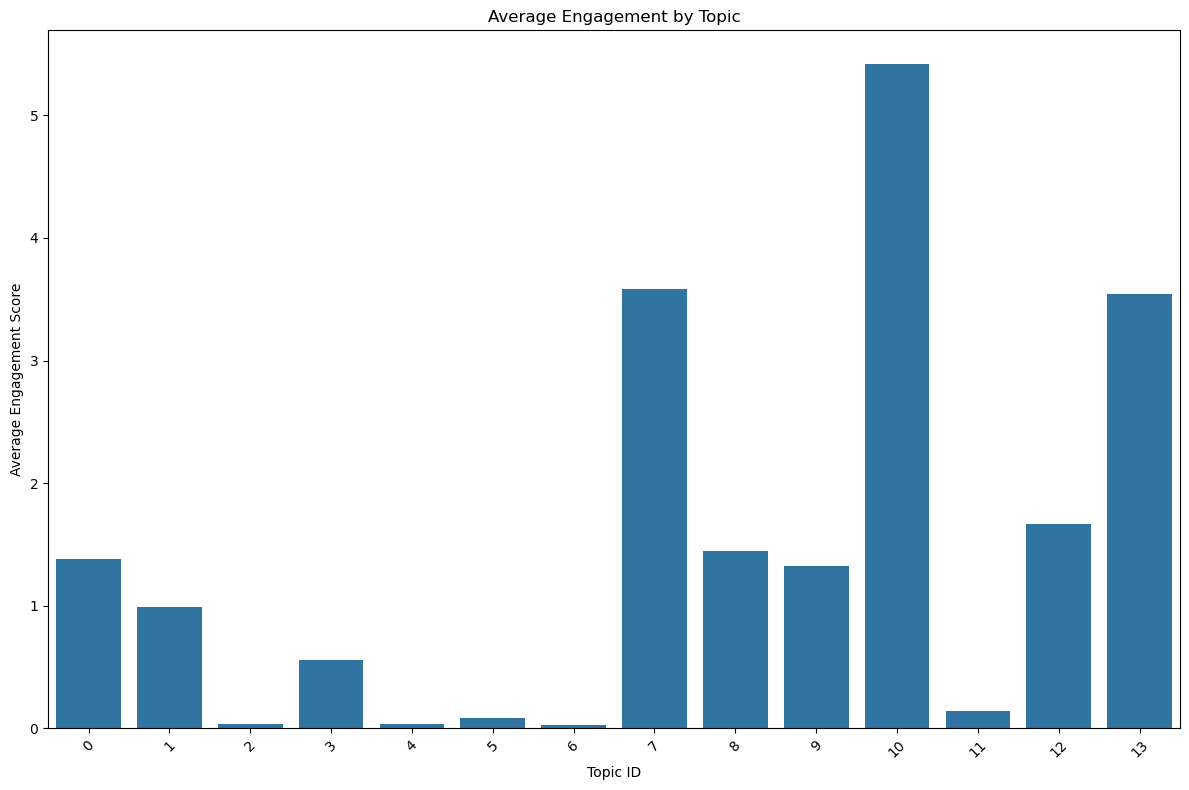

In [34]:
def analyze_topic_engagement_relationship(df_posts, output_file="topic_engagement_analysis.txt"):
    print("\n=== Analyzing Relationship Between Topics and Engagement ===")
    
    # 1. Create engagement score for each post
    df_posts['engagement_score'] = df_posts['num_likes'] + df_posts['num_shares'] + df_posts['num_comments']
    
    # 2. Clean the content for topic modeling
    df_posts['cleaned_content'] = df_posts['content'].apply(clean_text)
    documents = df_posts['cleaned_content'].tolist()
    
    # 3. Create and fit a single topic model on ALL posts
    sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
    topic_model = BERTopic(
        embedding_model=sentence_model,
        min_topic_size=5,
        nr_topics=15,
        verbose=True
    )
    
    # 4. Get topics for all posts
    topics, probs = topic_model.fit_transform(documents)
    df_posts['topic'] = topics
    
    # 5. Calculate engagement statistics by topic
    topic_stats = df_posts.groupby('topic').agg({
        'engagement_score': ['mean', 'median', 'std', 'count'],
        'num_likes': 'mean',
        'num_shares': 'mean',
        'num_comments': 'mean'
    }).sort_values(('engagement_score', 'mean'), ascending=False)
    
    # 6. Perform statistical analysis (ANOVA)
    from scipy import stats
    topics_to_test = [t for t in df_posts['topic'].unique() if t != -1 and sum(df_posts['topic'] == t) >= 5]
    
    groups = [df_posts[df_posts['topic'] == t]['engagement_score'] for t in topics_to_test]
    f_stat, p_value = stats.f_oneway(*groups)
    
    # 7. Write results to file
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write("=== TOPIC INFLUENCE ON ENGAGEMENT ANALYSIS ===\n\n")
        
        # Write overall statistics
        f.write("STATISTICAL SIGNIFICANCE:\n")
        f.write(f"ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_value:.5f}\n")
        if p_value < 0.05:
            f.write("SIGNIFICANT: There is a statistically significant relationship between topics and engagement.\n\n")
        else:
            f.write("NOT SIGNIFICANT: No statistically significant relationship between topics and engagement found.\n\n")
        
        # Write topic statistics
        f.write("TOPICS RANKED BY AVERAGE ENGAGEMENT:\n")
        f.write("=" * 80 + "\n")
        
        for topic_id, stats in topic_stats.iterrows():
            if topic_id == -1 or stats[('engagement_score', 'count')] < 5:
                continue
                
            f.write(f"TOPIC {topic_id} (Posts: {stats[('engagement_score', 'count')]:.0f})\n")
            f.write("-" * 40 + "\n")
            
            # Add keywords
            keywords = topic_model.get_topic(topic_id)
            f.write("Keywords: " + ", ".join([f"{word}" for word, _ in keywords[:8]]) + "\n\n")
            
            # Add engagement metrics
            f.write(f"Engagement: {stats[('engagement_score', 'mean')]:.2f} (±{stats[('engagement_score', 'std')]:.2f})\n")
            f.write(f"Likes: {stats[('num_likes', 'mean')]:.2f} | ")
            f.write(f"Shares: {stats[('num_shares', 'mean')]:.2f} | ")
            f.write(f"Comments: {stats[('num_comments', 'mean')]:.2f}\n\n")
            
            # Add examples of high and low engagement posts within this topic
            topic_posts = df_posts[df_posts['topic'] == topic_id].sort_values('engagement_score', ascending=False)
            
            f.write("HIGH ENGAGEMENT EXAMPLES:\n")
            for i, (_, post) in enumerate(topic_posts.head(5).iterrows(), 1):
                f.write(f"{i}. [Score: {post['engagement_score']:.0f}] {post['content'][:150]}...\n\n")
            
            f.write("LOW ENGAGEMENT EXAMPLES:\n")
            for i, (_, post) in enumerate(topic_posts.tail(5).iterrows(), 1):
                f.write(f"{i}. [Score: {post['engagement_score']:.0f}] {post['content'][:150]}...\n\n")
            
            f.write("=" * 80 + "\n\n")
        
        # Create visualizations
        plt.figure(figsize=(12, 8))
        topic_engagement = df_posts[df_posts['topic'] != -1].groupby('topic')['engagement_score'].mean().sort_values(ascending=False)
        sns.barplot(x=topic_engagement.index, y=topic_engagement.values)
        plt.title('Average Engagement by Topic')
        plt.xlabel('Topic ID')
        plt.ylabel('Average Engagement Score')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('topic_engagement.pdf')
        
    print(f"Analysis complete! Results saved to {output_file}")
    return topic_model, topics

# Run the analysis
topic_model, topics = analyze_topic_engagement_relationship(df_posts)

This approach has several advantages:
 - Direct analysis: Instead of comparing users, it directly analyzes the relationship between topics and engagement
 - Statistical testing: Uses ANOVA to determine if topic differences in engagement are statistically significant
 - Comprehensive metrics:
   - Creates a weighted engagement score (likes + shares2 + comments3)
   - Compares likes, shares, and comments separately
   - Shows mean, median, and standard deviation
 - Practical insights:
   - Ranks topics by engagement
   - Shows high and low engagement examples within each topic
   - Visualizes the engagement differences
 - Single model: Uses one topic model for all posts, making comparisons more reliable

This approach will give you much clearer evidence about whether certain topics tend to get higher engagement than others, with statistical backing and concrete examples.

Analysis of Topic Engagement Relationship
 - Based on the data in the topic_engagement_analysis.txt file, here's an analysis of how content topics relate to engagement:
Key Finding
 - The most important result is stated clearly at the beginning:
   - ANOVA result: F-statistic = 0.614, p-value = 0.84493
   - NOT SIGNIFICANT: No statistically significant relationship between topics and engagement found.
   - This means that statistically speaking, a post's topic doesn't reliably predict how much engagement it will receive.

Topic Engagement Patterns
 - Despite the lack of statistical significance, we can observe some interesting patterns:
   - News content dominates high-engagement topics:
     - The highest engagement topics (10, 7, 13) are primarily news-related
     - Topic 10 (Military news): 5.42 average engagement
     - Topic 7 (Black Friday/travel news): 3.59 average engagement
   - High variance within topics:
     - Many topics show extreme differences between high and low engagement posts
     - Topic 0 has a mean of 1.38 but std deviation of 42.36
     - This suggests individual post factors beyond topic drive engagement
   - Outlier effect:
     - Most topics have a few extremely high-engagement posts skewing their averages
     - For example, in Topic 0, a single post has 1309 engagement while most have 0-1

Content type patterns:
 - Breaking news with controversial elements receives highest engagement
 - Reposted content consistently shows lower engagement
 - Personal content (gaming, life stories) averages lower engagement

Engagement composition:
 - High-engagement posts often get their score from comments rather than likes
 - Topic 10: 0.44 likes | 0.74 shares | 4.24 comments

Conclusion
 - While certain topics appear to have higher average engagement, this relationship isn't statistically significant. The data suggests that engagement is likely driven by factors beyond topic alone - possibly including:
   - Content originality (vs. reposts)
   - Controversial or provocative elements
   - Timeliness/relevance
   - Individual post quality or writing style
   - User network effects
 - Rather than focusing solely on topic selection, content creators might benefit more from considering these other engagement drivers.

### So it's not the user persona, and it's not the content topic. 

### let's explore if creation time has anything to do with the popularity of posts

/tmp/ipykernel_1390920/1485089951.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_stats = sim_data.groupby('time_period').agg({
/tmp/ipykernel_1390920/1485089951.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_stats = sim_data.groupby('time_period').agg({


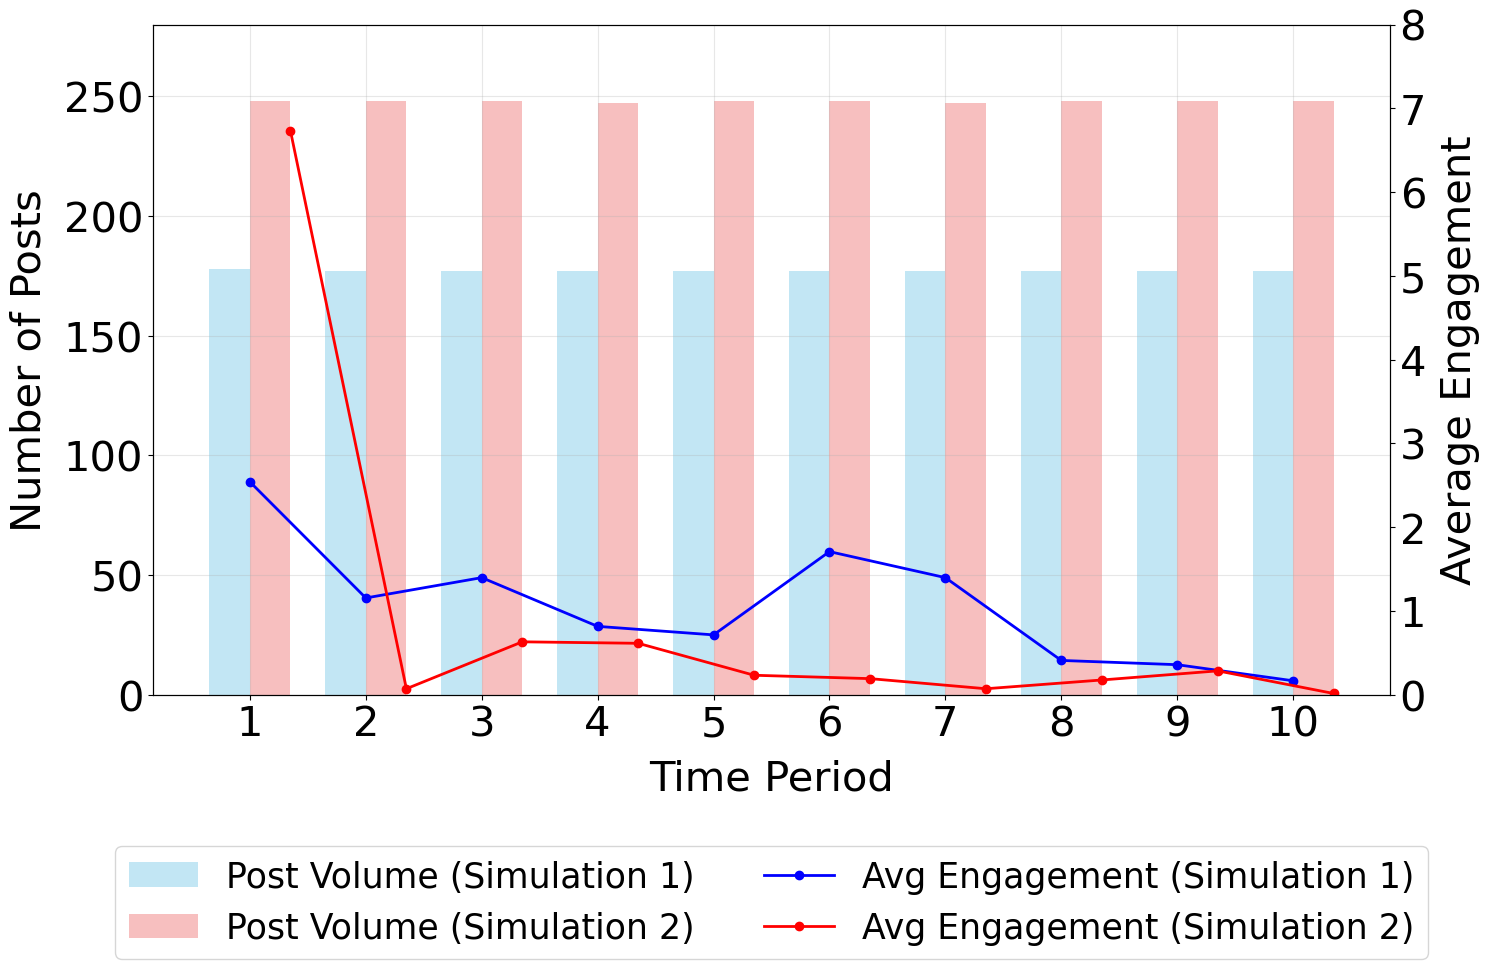


=== Post Volume and Engagement Statistics ===

Simulation 1:
Correlation between post volume and average engagement: 0.714

Period-wise statistics:
             post_id  total_engagement
time_period                           
Period 1         178              2.54
Period 2         177              1.15
Period 3         177              1.40
Period 4         177              0.81
Period 5         177              0.71
Period 6         177              1.71
Period 7         177              1.40
Period 8         177              0.41
Period 9         177              0.36
Period 10        177              0.16

Simulation 2:
Correlation between post volume and average engagement: 0.143

Period-wise statistics:
             post_id  total_engagement
time_period                           
Period 1         248              6.73
Period 2         248              0.07
Period 3         248              0.63
Period 4         247              0.61
Period 5         248              0.23
Period 6

/tmp/ipykernel_1390920/1485089951.py:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_engagement = sim_data.groupby('time_period').agg({
/tmp/ipykernel_1390920/1485089951.py:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_engagement = sim_data.groupby('time_period').agg({


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

conn1 = sqlite3.connect('20250122_215428.db')
posts_1 = pd.read_sql_query("SELECT * FROM posts", conn1)
conn2 = sqlite3.connect('20250124_235727.db')
posts_2 = pd.read_sql_query("SELECT * FROM posts", conn2)

# Process both simulations if not already done
def process_simulation_data(posts_df, simulation_id):
    posts = posts_df.copy()
    posts['created_at'] = pd.to_datetime(posts['created_at'])
    sim_start = posts['created_at'].min()
    posts['hours_since_start'] = (posts['created_at'] - sim_start).dt.total_seconds() / 3600
    posts['total_engagement'] = posts['num_likes'] + posts['num_shares'] + posts['num_comments']
    posts['simulation'] = f'Simulation {simulation_id}'
    posts['time_period'] = pd.qcut(posts['hours_since_start'], q=10, 
                                 labels=['Period ' + str(i+1) for i in range(10)])
    return posts

sim1_data = process_simulation_data(posts_1, 1)
sim2_data = process_simulation_data(posts_2, 2)
combined_data = pd.concat([sim1_data, sim2_data], ignore_index=True)

# Create the post volume and engagement plot
plt.figure(figsize=(15, 10))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Set color schemes
colors = {'Simulation 1': {'bar': 'skyblue', 'line': 'blue'},
          'Simulation 2': {'bar': 'lightcoral', 'line': 'red'}}

bar_width = 0.35
for idx, (sim_name, sim_data) in enumerate(combined_data.groupby('simulation')):
    # Calculate post volume and average engagement per period
    period_stats = sim_data.groupby('time_period').agg({
        'post_id': 'count',
        'total_engagement': 'mean'
    }).reset_index()
    
    # Plot post volume (bars)
    positions = np.arange(len(period_stats)) + (idx * bar_width)
    bars = ax1.bar(positions, 
                   period_stats['post_id'], 
                   bar_width,
                   alpha=0.5,
                   color=colors[sim_name]['bar'],
                   label=f'Post Volume ({sim_name})')
    
    # Plot average engagement (lines)
    line = ax2.plot(positions + bar_width/2, 
                    period_stats['total_engagement'],
                    marker='o',
                    color=colors[sim_name]['line'],
                    linewidth=2,
                    label=f'Avg Engagement ({sim_name})')

FONT_SIZE = 30
# Customize the plot
ax1.set_xlabel('Time Period', fontsize=FONT_SIZE, labelpad=10)
ax1.set_ylabel('Number of Posts', fontsize=FONT_SIZE, labelpad=10)
ax2.set_ylabel('Average Engagement', fontsize=FONT_SIZE, labelpad=10)



# plt.title('Post Volume and Average Engagement Over Time\nComparison of Two Simulations', 
#           fontsize=14, pad=20)

# Set x-axis ticks
plt.xticks(np.arange(10) + bar_width/2, [f'{i+1}' for i in range(10)], 
           rotation=45, fontsize=FONT_SIZE)
ax1.tick_params(axis='y', labelsize=FONT_SIZE)  # Left y-axis
ax2.tick_params(axis='y', labelsize=FONT_SIZE)  # Right y-axis
ax1.tick_params(axis='x', labelsize=FONT_SIZE)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# After plotting all data, set the y-axis limits to give more space at the top
ax1.set_ylim(0, 280)  # Adjust the upper limit (300) based on your data
ax2.set_ylim(0, 8)    # Adjust the upper limit (8) based on your engagement data

ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize=FONT_SIZE-5, ncol=2)

# Add grid for better readability
ax1.grid(True, alpha=0.3)

plt.tight_layout()
# save the plot
plt.savefig('post_volume_and_engagement_over_time.pdf')
plt.show()

# Print statistics
print("\n=== Post Volume and Engagement Statistics ===")
for sim_name, sim_data in combined_data.groupby('simulation'):
    print(f"\n{sim_name}:")
    
    # Calculate correlations between post volume and engagement
    volume_engagement = sim_data.groupby('time_period').agg({
        'post_id': 'count',
        'total_engagement': 'mean'
    })
    
    correlation = volume_engagement['post_id'].corr(volume_engagement['total_engagement'])
    
    print(f"Correlation between post volume and average engagement: {correlation:.3f}")
    print("\nPeriod-wise statistics:")
    print(volume_engagement.round(2))
    


# statistical analysis for time vs engagement

In [58]:
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

# Statistical Analysis of Post Volume vs Engagement Relationship
print("=== Statistical Analysis of Post Volume vs Engagement ===\n")

for sim_name, sim_data in combined_data.groupby('simulation'):
    print(f"\n{sim_name}:")
    
    # Calculate period-wise statistics
    period_stats = sim_data.groupby('time_period').agg({
        'post_id': 'count',
        'total_engagement': 'mean'
    }).reset_index()
    
    # 1. Pearson Correlation Test
    correlation, p_value = stats.pearsonr(period_stats['post_id'], 
                                        period_stats['total_engagement'])
    print(f"\n1. Pearson Correlation Test:")
    print(f"Correlation coefficient: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}")
    print(f"Significant at p<0.05: {p_value < 0.05}")
    
    # 2. Spearman Rank Correlation (for non-linear relationships)
    spearman_corr, spearman_p = stats.spearmanr(period_stats['post_id'], 
                                               period_stats['total_engagement'])
    print(f"\n2. Spearman Rank Correlation Test:")
    print(f"Correlation coefficient: {spearman_corr:.3f}")
    print(f"P-value: {spearman_p:.3f}")
    print(f"Significant at p<0.05: {spearman_p < 0.05}")
    
    # 3. Linear Regression
    X = period_stats['post_id'].values.reshape(-1, 1)
    y = period_stats['total_engagement'].values
    
    model = LinearRegression()
    model.fit(X, y)
    r_squared = model.score(X, y)
    
    # Calculate the F-statistic and p-value
    n = len(X)
    p = 1  # number of predictors
    f_stat = (r_squared / p) / ((1 - r_squared) / (n - p - 1))
    p_value_f = 1 - stats.f.cdf(f_stat, p, n - p - 1)
    
    print(f"\n3. Linear Regression Analysis:")
    print(f"R-squared: {r_squared:.3f}")
    print(f"Slope: {model.coef_[0]:.3f}")
    print(f"F-statistic: {f_stat:.3f}")
    print(f"P-value: {p_value_f:.3f}")
    print(f"Significant at p<0.05: {p_value_f < 0.05}")
    
    # 4. Effect Size (Cohen's f²)
    cohens_f2 = r_squared / (1 - r_squared)
    print(f"\n4. Effect Size:")
    print(f"Cohen's f²: {cohens_f2:.3f}")
    print("Effect size interpretation:")
    print("- Small effect: f² ≥ 0.02")
    print("- Medium effect: f² ≥ 0.15")
    print("- Large effect: f² ≥ 0.35")

=== Statistical Analysis of Post Volume vs Engagement ===


Simulation 1:

1. Pearson Correlation Test:
Correlation coefficient: 0.714
P-value: 0.020
Significant at p<0.05: True

2. Spearman Rank Correlation Test:
Correlation coefficient: 0.524
P-value: 0.120
Significant at p<0.05: False

3. Linear Regression Analysis:
R-squared: 0.509
Slope: 1.639
F-statistic: 8.307
P-value: 0.020
Significant at p<0.05: True

4. Effect Size:
Cohen's f²: 1.038
Effect size interpretation:
- Small effect: f² ≥ 0.02
- Medium effect: f² ≥ 0.15
- Large effect: f² ≥ 0.35

Simulation 2:

1. Pearson Correlation Test:
Correlation coefficient: 0.143
P-value: 0.693
Significant at p<0.05: False

2. Spearman Rank Correlation Test:
Correlation coefficient: 0.000
P-value: 1.000
Significant at p<0.05: False

3. Linear Regression Analysis:
R-squared: 0.020
Slope: 0.699
F-statistic: 0.167
P-value: 0.693
Significant at p<0.05: False

4. Effect Size:
Cohen's f²: 0.021
Effect size interpretation:
- Small effect: f² ≥ 0.02


### So it's not necessarily time either. we have to explore agent's own reasoning for engagement

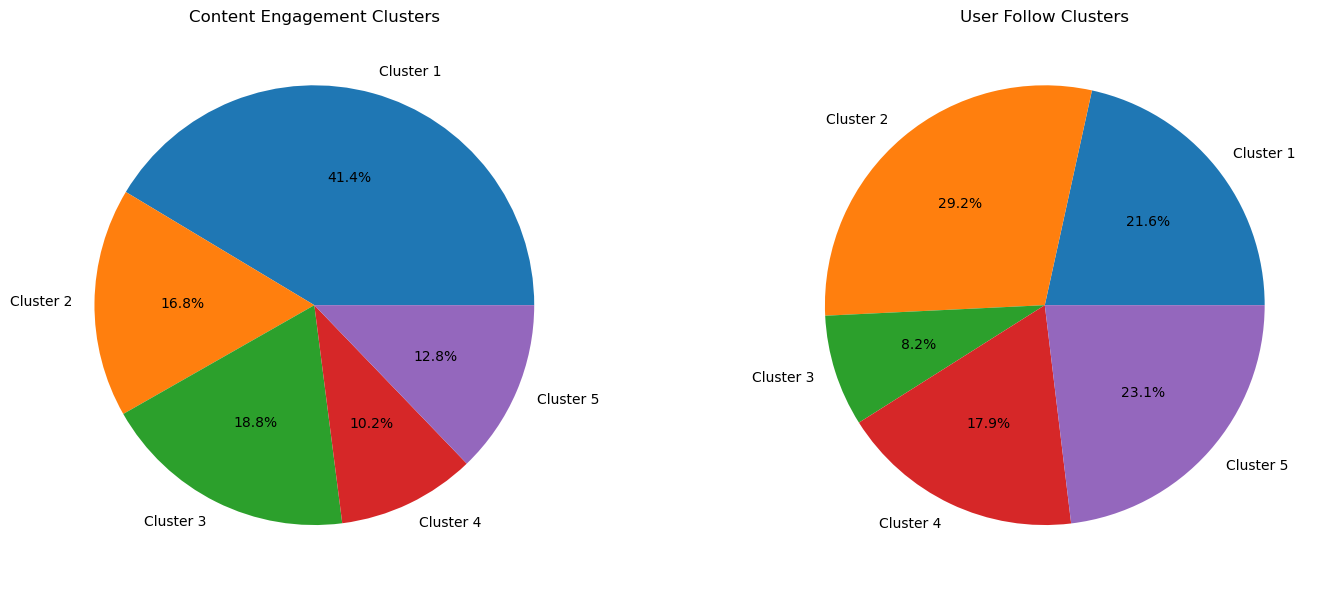


Content Engagement Clusters:
Cluster 1: post, resonates, values, community, travel
Cluster 2: empowerment, perfectly, aligns, youth, education
Cluster 3: want, support, engage, conversation, importance
Cluster 4: initiative, ai, youth, skills, crucial
Cluster 5: values, aligns, community, education, perfectly

User Follow Clusters:
Cluster 1: news, credible, interests, align, consistently
Cluster 2: valuable, insights, consistently, provide, education
Cluster 3: content, aligns, interests, user, shares
Cluster 4: thoughtfully, engage, engages, community, user
Cluster 5: community, values, focus, thoughtful, appreciate


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np

# Read the CSV file
df = pd.read_csv('merged_user_actions.csv')

# Filter for engagement actions
content_engagement = df[df['action_type'].isin(['comment', 'share_post', 'like_post'])]
user_follows = df[df['action_type'] == 'follow_user']

# Function to perform clustering and analysis
def analyze_reasons(data, n_clusters=5):
    # Vectorize the reasoning text
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(data['reasoning'])
    
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Get the most representative terms for each cluster
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    
    # Count samples in each cluster
    cluster_sizes = Counter(clusters)
    
    return clusters, cluster_sizes, terms, order_centroids

# Analyze content engagement
content_clusters, content_sizes, content_terms, content_centroids = analyze_reasons(content_engagement)

# Analyze user follows
follow_clusters, follow_sizes, follow_terms, follow_centroids = analyze_reasons(user_follows)

# Plotting
plt.figure(figsize=(15, 6))

# Plot content engagement clusters
plt.subplot(1, 2, 1)
plt.pie(content_sizes.values(), labels=[f'Cluster {i+1}' for i in range(len(content_sizes))],
        autopct='%1.1f%%')
plt.title('Content Engagement Clusters')

# Plot user follow clusters
plt.subplot(1, 2, 2)
plt.pie(follow_sizes.values(), labels=[f'Cluster {i+1}' for i in range(len(follow_sizes))],
        autopct='%1.1f%%')
plt.title('User Follow Clusters')

plt.tight_layout()
plt.show()

# Print top terms for each cluster
def print_cluster_terms(centroids, terms, n_terms=5):
    clusters_terms = []
    for i in range(len(centroids)):
        top_terms = [terms[ind] for ind in centroids[i, :n_terms]]
        clusters_terms.append(f"Cluster {i+1}: {', '.join(top_terms)}")
    return clusters_terms

print("\nContent Engagement Clusters:")
print("\n".join(print_cluster_terms(content_centroids, content_terms)))

print("\nUser Follow Clusters:")
print("\n".join(print_cluster_terms(follow_centroids, follow_terms)))


Analyzing Content Engagement...


Batches:   0%|          | 0/86 [00:00<?, ?it/s]


=== Content Engagement Clusters Analysis ===

Cluster 1:
Size: 325 instances

Most representative examples:
1. [like_post] I appreciate the focus on resilience and the community spirit that aligns with my values.
2. [like_post] I resonate with the appreciation for community and staying connected.
3. [like_post] Totally relates to my values about friendship and community support.
4. [share_post] This post resonates with my values on education and community development.
5. [share_post] This post resonates with my values on education and community development.

Action type distribution:
like_post     141
comment       124
share_post     60
Name: count, dtype: int64
--------------------------------------------------------------------------------
Cluster represents 11.9% of all Content Engagement
--------------------------------------------------------------------------------

Cluster 2:
Size: 452 instances

Most representative examples:
1. [share_post] This initiative is crucial for youth

Batches:   0%|          | 0/23 [00:00<?, ?it/s]


=== User Follows Clusters Analysis ===

Cluster 1:
Size: 112 instances

Most representative examples:
1. [follow_user] They consistently share credible news updates that are valuable and align with my interests.
2. [follow_user] They consistently share credible news updates that align with my interests.
3. [follow_user] They consistently share credible news and updates that align with my interests.
4. [follow_user] They consistently share credible news and updates that align with my interests.
5. [follow_user] They consistently share credible news and updates that align with my interests.

Action type distribution:
follow_user    112
Name: count, dtype: int64
--------------------------------------------------------------------------------
Cluster represents 15.6% of all User Follows
--------------------------------------------------------------------------------

Cluster 2:
Size: 30 instances

Most representative examples:
1. [follow_user] Their journey of resilience and motherhood re

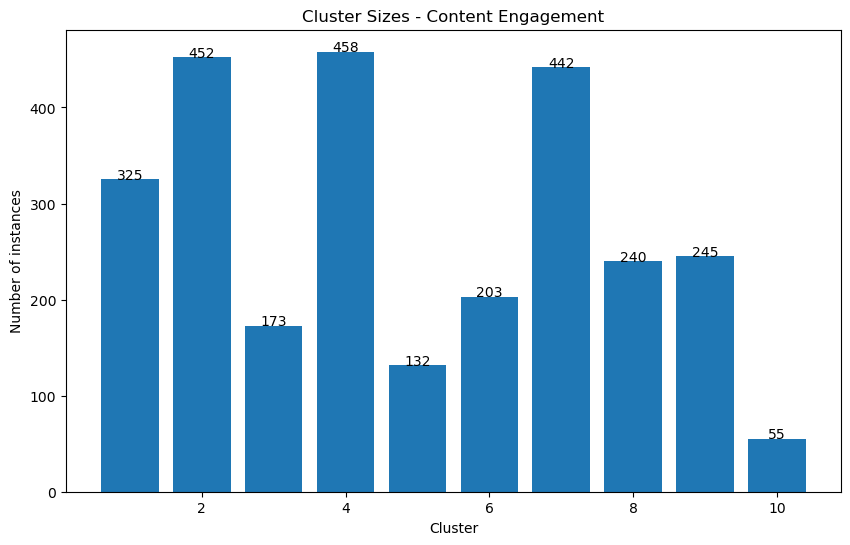

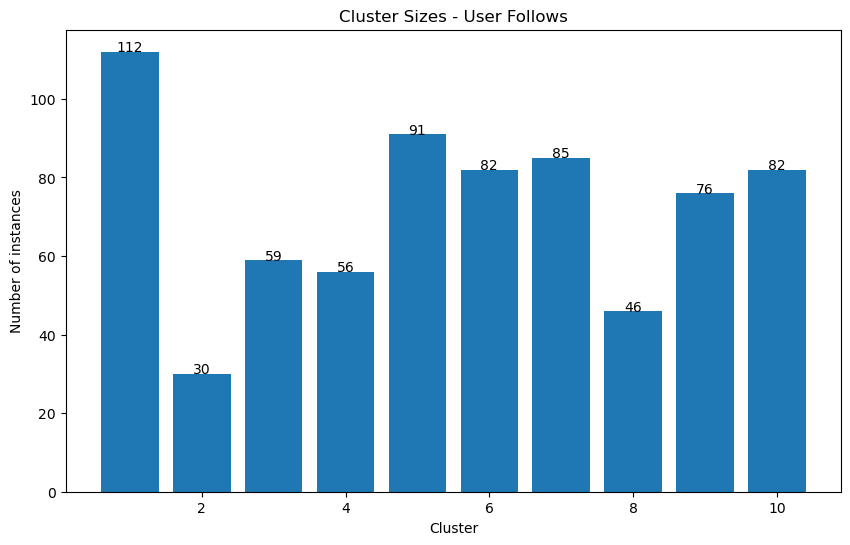

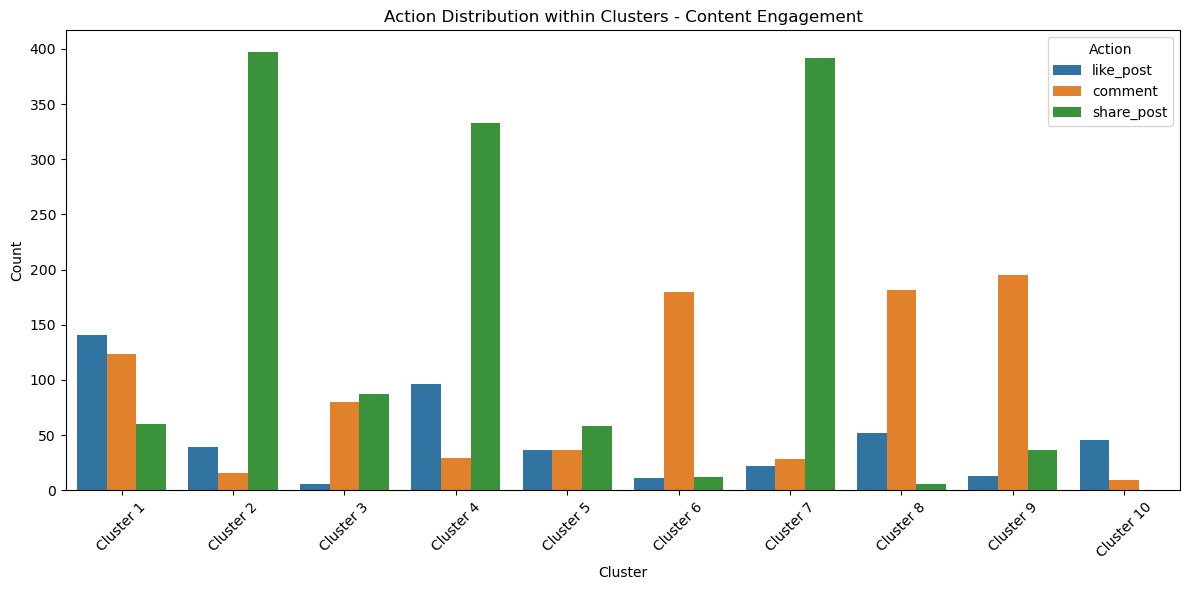

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

N_CLUSTERS = 10 

# Read the CSV file
df = pd.read_csv('merged_user_actions.csv')

# Filter for engagement actions
content_engagement = df[df['action_type'].isin(['comment', 'share_post', 'like_post'])]
user_follows = df[df['action_type'] == 'follow_user']

def analyze_reasons_bert(data, name="", n_clusters=N_CLUSTERS):
    # Load BERT model
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Get BERT embeddings
    embeddings = model.encode(data['reasoning'].tolist(), show_progress_bar=True)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(embeddings)
    
    # Create a dictionary to store examples for each cluster
    cluster_examples = defaultdict(list)
    for idx, cluster in enumerate(clusters):
        cluster_examples[cluster].append({
            'reasoning': data['reasoning'].iloc[idx],
            'action_type': data['action_type'].iloc[idx],
            'embedding': embeddings[idx]
        })
    
    # Analyze each cluster
    print(f"\n=== {name} Clusters Analysis ===")
    for cluster in range(n_clusters):
        print(f"\nCluster {cluster + 1}:")
        
        cluster_data = cluster_examples[cluster]
        print(f"Size: {len(cluster_data)} instances")
        
        # Find most representative examples using cosine similarity to cluster centroid
        cluster_embeddings = np.array([ex['embedding'] for ex in cluster_data])
        centroid = kmeans.cluster_centers_[cluster]
        similarities = cosine_similarity([centroid], cluster_embeddings)[0]
        most_representative_idx = np.argsort(similarities)[-5:][::-1]  # Get top 5 examples
        
        print("\nMost representative examples:")
        for idx, rep_idx in enumerate(most_representative_idx, 1):
            example = cluster_data[rep_idx]
            print(f"{idx}. [{example['action_type']}] {example['reasoning']}")
        
        # Action type distribution in cluster
        action_counts = pd.Series([ex['action_type'] for ex in cluster_data]).value_counts()
        print("\nAction type distribution:")
        print(action_counts)
        print("-" * 80)

        # Calculate percentage of cluster
        cluster_percentage = (len(cluster_data) / len(data)) * 100
        print(f"Cluster represents {cluster_percentage:.1f}% of all {name}")
        print("-" * 80)

    return clusters, cluster_examples

# Analyze content engagement
print("\nAnalyzing Content Engagement...")
content_clusters, content_examples = analyze_reasons_bert(content_engagement, "Content Engagement")

print("\nAnalyzing User Follows...")
follow_clusters, follow_examples = analyze_reasons_bert(user_follows, "User Follows")

# Visualize cluster sizes
def plot_cluster_sizes(cluster_examples, n_clusters, title):
    sizes = [len(cluster_examples[i]) for i in range(n_clusters)]
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_clusters + 1), sizes)
    plt.title(f'Cluster Sizes - {title}')
    plt.xlabel('Cluster')
    plt.ylabel('Number of instances')
    for i, v in enumerate(sizes):
        plt.text(i + 1, v, str(v), ha='center')
    plt.show()

# Plot distribution of clusters
plot_cluster_sizes(content_examples, N_CLUSTERS, "Content Engagement")
plot_cluster_sizes(follow_examples, N_CLUSTERS, "User Follows")

# Visualize action type distribution within clusters
def plot_action_distribution(cluster_examples, n_clusters, title):
    action_data = []
    for cluster in range(n_clusters):
        actions = [ex['action_type'] for ex in cluster_examples[cluster]]
        action_counts = pd.Series(actions).value_counts()
        for action, count in action_counts.items():
            action_data.append({
                'Cluster': f'Cluster {cluster + 1}',
                'Action': action,
                'Count': count
            })
    
    df_actions = pd.DataFrame(action_data)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_actions, x='Cluster', y='Count', hue='Action')
    plt.title(f'Action Distribution within Clusters - {title}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot action distributions
plot_action_distribution(content_examples, N_CLUSTERS, "Content Engagement")


Analyzing Like Reasons


Batches:   0%|          | 0/15 [00:00<?, ?it/s]


Cluster 1:
Size: 56 (12.1% of all Likes)

Most representative examples:
1. Investing in youth skills is crucial, and this initiative aligns with my values.
2. I appreciate the focus on investing in youth and future skills.
3. I appreciate the focus on investing in youth and skills for the future.
4. I appreciate the emphasis on investing in youth and future skills.
5. I love seeing investments in youth development; this aligns with my values!
--------------------------------------------------------------------------------

Cluster 2:
Size: 57 (12.3% of all Likes)

Most representative examples:
1. I resonate with the idea of traveling with friends, it adds joy to experiences.
2. I resonate with the idea that traveling with friends enhances the experience.
3. I resonate with the importance of traveling with friends and creating memories!
4. I resonate with the importance of traveling with friends, and it brings back good vibes!
5. I love the idea of traveling with friends, and this post

Batches:   0%|          | 0/28 [00:00<?, ?it/s]


Cluster 1:
Size: 187 (21.2% of all Comments)

Most representative examples:
1. This resonates with my commitment to social justice and supporting meaningful discussions.
2. This resonates with my commitment to social justice and supporting victims.
3. This resonates with my commitment to social justice and supporting victims of injustice.
4. This resonates with my values of justice and community support.
5. This resonates with my values of justice and community support.
--------------------------------------------------------------------------------

Cluster 2:
Size: 188 (21.4% of all Comments)

Most representative examples:
1. I resonate with the importance of shared experiences in travel.
2. This resonates with my love for travel and the importance of sharing experiences.
3. I resonate with the idea of shared experiences enhancing travel, reflecting my values.
4. This resonates with my love for travel and the importance of shared experiences.
5. This resonates with my love for trave

Batches:   0%|          | 0/44 [00:00<?, ?it/s]


Cluster 1:
Size: 397 (28.7% of all Shares)

Most representative examples:
1. This initiative is crucial for youth education in AI, aligning with my values.
2. This initiative for youth education in AI is crucial and aligns with my values.
3. This initiative supports youth education in AI, aligning with my values.
4. This AI initiative for youth education is crucial and aligns with my values.
5. I'm super passionate about youth education in AI, and this post highlights an important initiative.
--------------------------------------------------------------------------------

Cluster 2:
Size: 310 (22.4% of all Shares)

Most representative examples:
1. This aligns perfectly with my passion for youth empowerment and education.
2. This aligns perfectly with my passion for youth empowerment and education.
3. This aligns perfectly with my passion for youth empowerment and education.
4. This aligns perfectly with my passion for youth empowerment and education.
5. This aligns perfectly with my 

Batches:   0%|          | 0/23 [00:00<?, ?it/s]


Cluster 1:
Size: 169 (23.5% of all Follows)

Most representative examples:
1. They consistently share credible news updates that are valuable and align with my interests.
2. They consistently share credible and valuable news content that aligns with my interests.
3. They consistently share valuable and credible news that aligns with my interests.
4. They consistently share valuable and credible news that aligns with my interests.
5. They consistently share valuable and credible news that aligns with my interests.
--------------------------------------------------------------------------------

Cluster 2:
Size: 88 (12.2% of all Follows)

Most representative examples:
1. Their content on youth empowerment and education resonates with my interests.
2. They share valuable insights on youth empowerment and tech that resonate with my interests.
3. They share valuable insights on youth empowerment and social issues that resonate with me.
4. Their posts provide valuable insights on youth init

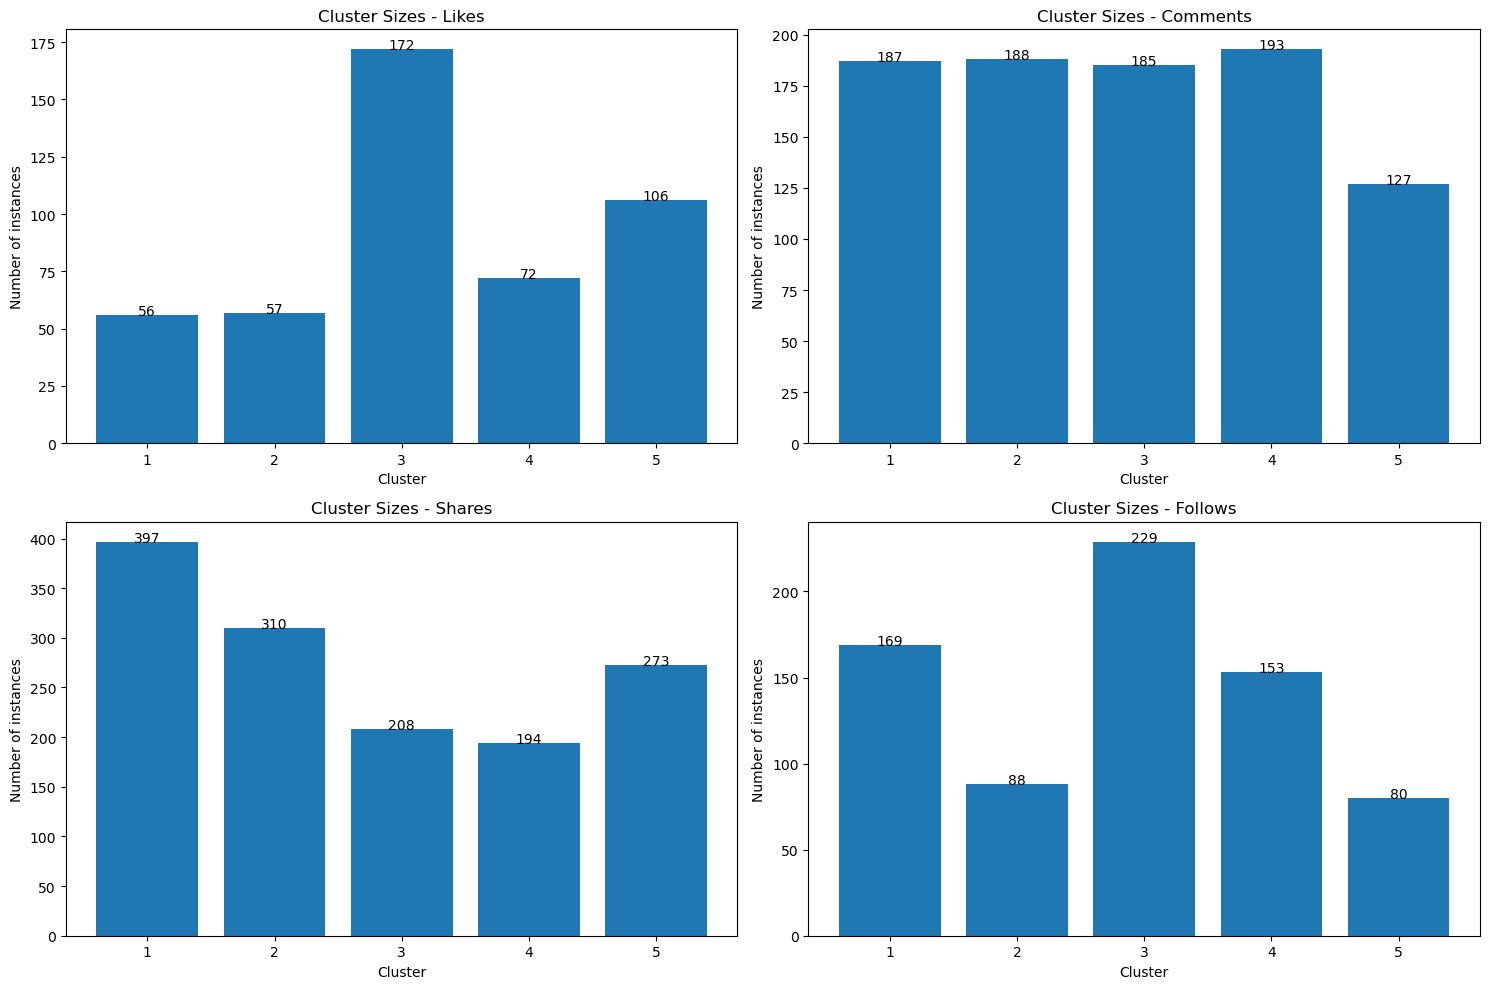


Cluster Similarity Heatmap for Likes


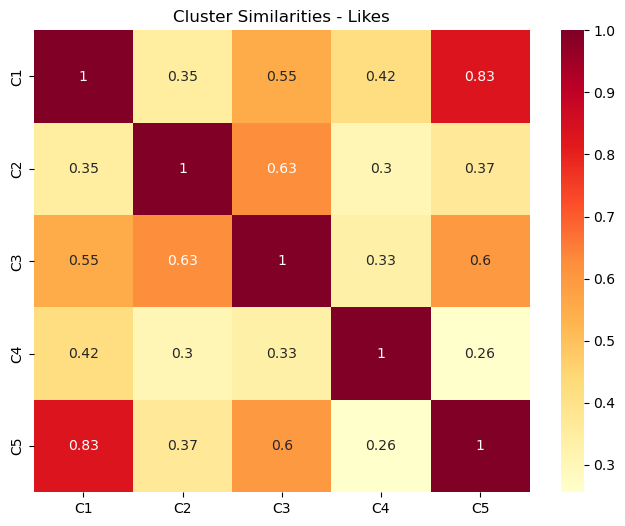


Cluster Similarity Heatmap for Comments


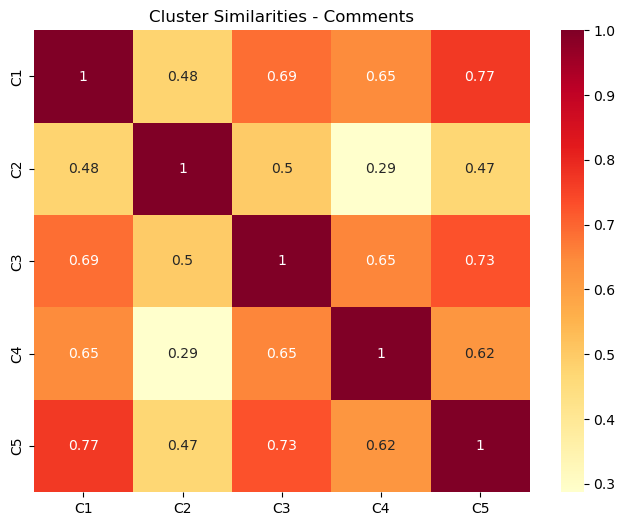


Cluster Similarity Heatmap for Shares


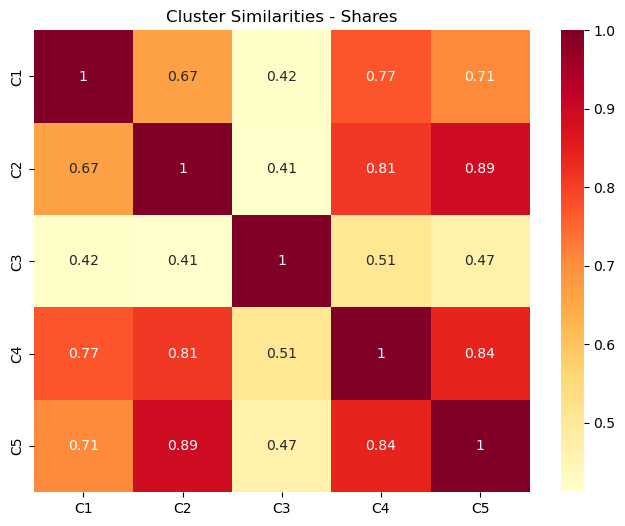


Cluster Similarity Heatmap for Follows


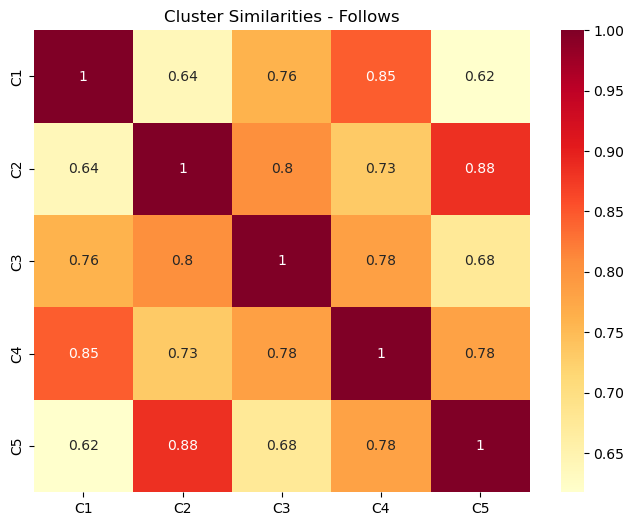

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# Read the CSV file
df = pd.read_csv('merged_user_actions.csv')

def analyze_action_reasons(data, action_name, n_clusters=5):
    print(f"\n{'='*40}")
    print(f"Analyzing {action_name} Reasons")
    print(f"{'='*40}")
    
    # Load BERT model
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Get BERT embeddings
    embeddings = model.encode(data['reasoning'].tolist(), show_progress_bar=True)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(embeddings)
    
    # Store examples for each cluster
    cluster_examples = defaultdict(list)
    for idx, cluster in enumerate(clusters):
        cluster_examples[cluster].append({
            'reasoning': data['reasoning'].iloc[idx],
            'embedding': embeddings[idx]
        })
    
    # Analyze each cluster
    for cluster in range(n_clusters):
        print(f"\nCluster {cluster + 1}:")
        
        cluster_data = cluster_examples[cluster]
        cluster_size = len(cluster_data)
        cluster_percentage = (cluster_size / len(data)) * 100
        
        print(f"Size: {cluster_size} ({cluster_percentage:.1f}% of all {action_name}s)")
        
        # Find most representative examples
        cluster_embeddings = np.array([ex['embedding'] for ex in cluster_data])
        centroid = kmeans.cluster_centers_[cluster]
        similarities = cosine_similarity([centroid], cluster_embeddings)[0]
        most_representative_idx = np.argsort(similarities)[-5:][::-1]
        
        print("\nMost representative examples:")
        for idx, rep_idx in enumerate(most_representative_idx, 1):
            example = cluster_data[rep_idx]
            print(f"{idx}. {example['reasoning']}")
        
        print("-" * 80)
    
    return clusters, cluster_examples

# Analyze each action type separately
action_types = {
    'like_post': 'Like',
    'comment': 'Comment',
    'share_post': 'Share',
    'follow_user': 'Follow'
}

results = {}
for action_type, action_name in action_types.items():
    action_data = df[df['action_type'] == action_type]
    if len(action_data) > 0:
        # Adjust number of clusters based on data size
        n_clusters = min(5, len(action_data) // 10) if len(action_data) >= 20 else 3
        results[action_type] = analyze_action_reasons(action_data, action_name, n_clusters)

# Visualization of cluster sizes for each action type
plt.figure(figsize=(15, 10))
for idx, (action_type, (clusters, cluster_examples)) in enumerate(results.items(), 1):
    plt.subplot(2, 2, idx)
    
    sizes = [len(cluster_examples[i]) for i in range(len(set(clusters)))]
    plt.bar(range(1, len(sizes) + 1), sizes)
    plt.title(f'Cluster Sizes - {action_types[action_type]}s')
    plt.xlabel('Cluster')
    plt.ylabel('Number of instances')
    
    for i, v in enumerate(sizes):
        plt.text(i + 1, v, str(v), ha='center')

plt.tight_layout()
plt.show()

# Calculate and display inter-cluster similarities for each action type
def calculate_cluster_similarities(cluster_centers):
    similarities = cosine_similarity(cluster_centers)
    return similarities

for action_type, (clusters, cluster_examples) in results.items():
    if len(set(clusters)) > 1:  # Only show heatmap if there's more than one cluster
        print(f"\nCluster Similarity Heatmap for {action_types[action_type]}s")
        
        # Get cluster centers from the stored results
        cluster_centers = np.array([np.mean([ex['embedding'] for ex in cluster_examples[i]], axis=0) 
                                  for i in range(len(set(clusters)))])
        
        similarities = calculate_cluster_similarities(cluster_centers)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(similarities, annot=True, cmap='YlOrRd', 
                    xticklabels=[f'C{i+1}' for i in range(len(similarities))],
                    yticklabels=[f'C{i+1}' for i in range(len(similarities))])
        plt.title(f'Cluster Similarities - {action_types[action_type]}s')
        plt.show()

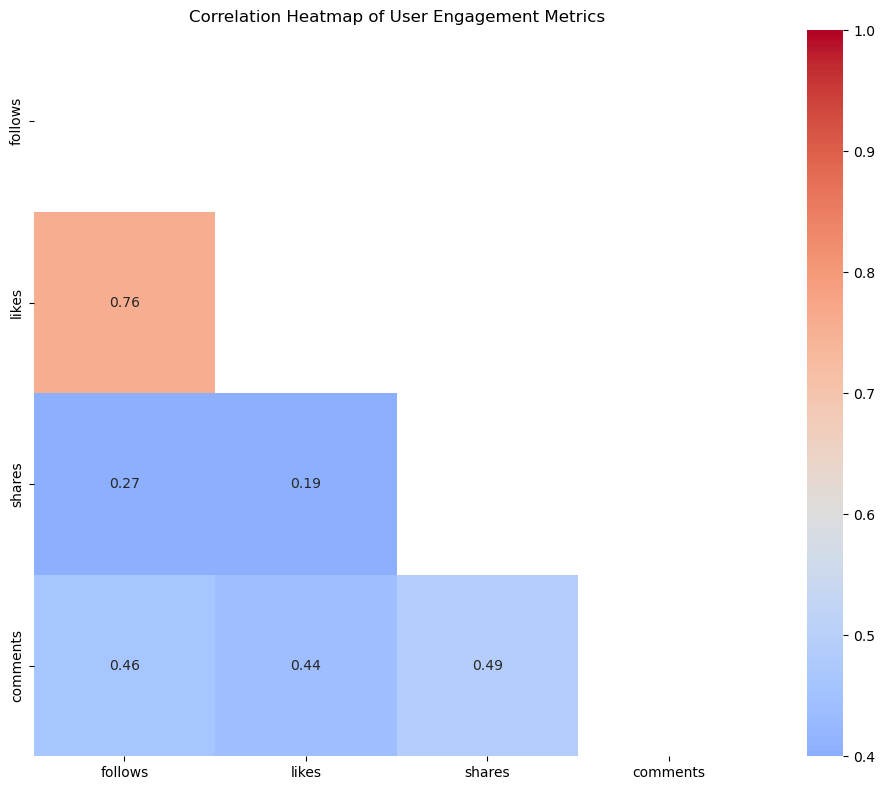

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('merged_users.csv')

df = df[df['user_id'] != 'agentverse_news']  # exclude user "agentverse_news"

# Select the engagement metrics columns
engagement_metrics = df[['follower_count', 'total_likes_received', 
                        'total_shares_received', 'total_comments_received']]
# Calculate correlation matrix
correlation_matrix = engagement_metrics.corr()

# Create a heatmap for the lower triangle
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Create a mask for the upper triangle
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            vmin=0.4, vmax=1,  # Set correlation range
            center=0.6,
            square=True,
            mask=mask,  # Apply the mask
            xticklabels=['follows', 'likes', 'shares', 'comments'],
            yticklabels=['follows', 'likes', 'shares', 'comments'])

plt.title('Correlation Heatmap of User Engagement Metrics')
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('merged_users.csv')

# Select the engagement metrics columns
engagement_metrics = df[['follower_count', 'total_likes_received', 
                        'total_shares_received', 'total_comments_received']]

# Calculate correlation matrix
correlation_matrix = engagement_metrics.corr()


# print in one line
print(correlation_matrix.round(3).to_string())


                         follower_count  total_likes_received  total_shares_received  total_comments_received
follower_count                    1.000                 0.856                  0.729                    0.759
total_likes_received              0.856                 1.000                  0.947                    0.956
total_shares_received             0.729                 0.947                  1.000                    0.994
total_comments_received           0.759                 0.956                  0.994                    1.000


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from collections import Counter
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import spacy

# Download required NLTK resources
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Load spaCy for entity extraction
try:
    nlp = spacy.load("en_core_web_sm")
except:
    import sys
    !{sys.executable} -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")

# Load data
df_actions = pd.read_csv('merged_user_actions.csv')
df_posts = pd.read_csv('merged_posts.csv')
df_users = pd.read_csv('merged_users.csv')

print(f"Loaded {len(df_actions)} action records")
print(f"Column names in actions: {df_actions.columns.tolist()}")
print(f"Column names in posts: {df_posts.columns.tolist()}")

# Join post content to the actions - fixed the column name issue
df_analysis = df_actions.merge(df_posts[['post_id', 'content', 'author_id']], 
                              left_on='target_id', right_on='post_id', how='left')

# Now we can continue with the join to users
df_analysis = df_analysis.merge(df_users[['user_id', 'persona', 'background_labels']], 
                               left_on='user_id', right_on='user_id', how='left')

# Join post author info separately
df_analysis = df_analysis.merge(df_users[['user_id', 'persona', 'background_labels']], 
                               left_on='author_id', right_on='user_id', how='left',
                               suffixes=('', '_author'))

print(f"Analysis dataset: {len(df_analysis)} rows")

# Filter to only actions with reasoning provided
df_analysis = df_analysis[df_analysis['reasoning'].notna() & (df_analysis['reasoning'] != '')]
print(f"Actions with reasoning: {len(df_analysis)}")

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df_analysis['sentiment_scores'] = df_analysis['reasoning'].apply(lambda x: sia.polarity_scores(x) if isinstance(x, str) else None)
df_analysis['sentiment_compound'] = df_analysis['sentiment_scores'].apply(lambda x: x['compound'] if x else None)
df_analysis['sentiment'] = df_analysis['sentiment_compound'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Define reason categories
reason_categories = {
    'personal_interest': ['interest', 'enjoy', 'like', 'love', 'passion', 'hobby', 'relatable'],
    'information_value': ['information', 'informative', 'learn', 'knowledge', 'educational', 'valuable'],
    'emotional_reaction': ['feel', 'emotion', 'moved', 'touched', 'happy', 'sad', 'angry'],
    'social_connection': ['connect', 'relate', 'community', 'friend', 'social', 'support'],
    'content_quality': ['quality', 'well-written', 'thoughtful', 'creative', 'unique'],
    'agreement': ['agree', 'support', 'align', 'similar', 'share view', 'same'],
    'disagreement': ['disagree', 'different', 'don\'t agree', 'object', 'oppose'],
    'curiosity': ['curious', 'interesting', 'intriguing', 'wonder', 'question'],
    'misinformation': ['false', 'mislead', 'incorrect', 'inaccurate', 'fake', 'not true'],
    'authenticity': ['authentic', 'genuine', 'honest', 'real', 'truthful', 'transparent']
}

# Function to categorize reasons
def categorize_reason(text):
    if not isinstance(text, str):
        return []
    
    text = text.lower()
    categories = []
    
    for category, keywords in reason_categories.items():
        if any(keyword in text for keyword in keywords):
            categories.append(category)
    
    return categories if categories else ['uncategorized']

df_analysis['reason_categories'] = df_analysis['reasoning'].apply(categorize_reason)

# Create an exploded dataframe for category analysis
df_categories = df_analysis.explode('reason_categories')

# Create the analysis report
with open("agent_reasoning_analysis.txt", "w") as f:
    f.write("# Analysis of Agent Reasoning for Content Engagement\n\n")
    
    # Overview statistics
    f.write("## Overview\n")
    f.write(f"Total actions analyzed: {len(df_analysis)}\n")
    action_counts = df_analysis['action_type'].value_counts()
    f.write("Actions by type:\n")
    for action, count in action_counts.items():
        f.write(f"- {action}: {count} ({count/len(df_analysis)*100:.1f}%)\n")
    
    # Sentiment Analysis
    f.write("\n## Sentiment Analysis of Reasoning\n")
    sentiment_overall = df_analysis['sentiment'].value_counts(normalize=True) * 100
    f.write(f"Overall sentiment distribution:\n")
    for sentiment, pct in sentiment_overall.items():
        f.write(f"- {sentiment}: {pct:.1f}%\n")
    
    f.write("\nSentiment by action type:\n")
    sentiment_by_action = df_analysis.groupby('action_type')['sentiment'].value_counts(normalize=True).unstack() * 100
    for action in sentiment_by_action.index:
        f.write(f"- {action}:\n")
        for sentiment in ['positive', 'neutral', 'negative']:
            if sentiment in sentiment_by_action.columns:
                f.write(f"  - {sentiment}: {sentiment_by_action.loc[action, sentiment]:.1f}%\n")
    
    # Reason Categories Analysis
    f.write("\n## Reasoning Categories\n")
    category_counts = df_categories['reason_categories'].value_counts()
    f.write("Most common reasoning categories:\n")
    for category, count in category_counts.head(10).items():
        f.write(f"- {category}: {count} ({count/len(df_categories)*100:.1f}%)\n")
    
    f.write("\nReasoning categories by action type:\n")
    category_by_action = df_categories.groupby(['action_type', 'reason_categories']).size().unstack(fill_value=0)
    category_pct = category_by_action.div(category_by_action.sum(axis=1), axis=0) * 100
    
    for action in category_pct.index:
        f.write(f"- {action}:\n")
        top_categories = category_pct.loc[action].sort_values(ascending=False).head(5)
        for category, pct in top_categories.items():
            f.write(f"  - {category}: {pct:.1f}%\n")
    
    # Word frequency analysis
    f.write("\n## Common Words in Reasoning\n")
    
    def clean_text(text):
        if not isinstance(text, str):
            return ""
        text = text.lower()
        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
        # Tokenize
        words = nltk.word_tokenize(text)
        # Remove stopwords
        stop_words = set(nltk.corpus.stopwords.words('english'))
        words = [word for word in words if word not in stop_words and len(word) > 2]
        return words
    
    all_words = []
    for reasoning in df_analysis['reasoning'].dropna():
        all_words.extend(clean_text(reasoning))
    
    word_counts = Counter(all_words).most_common(20)
    f.write("Most common words across all reasonings:\n")
    for word, count in word_counts:
        f.write(f"- {word}: {count}\n")
    
    f.write("\nMost common words by action type:\n")
    for action, group in df_analysis.groupby('action_type'):
        f.write(f"- {action}:\n")
        action_words = []
        for reasoning in group['reasoning'].dropna():
            action_words.extend(clean_text(reasoning))
        action_word_counts = Counter(action_words).most_common(10)
        for word, count in action_word_counts:
            f.write(f"  - {word}: {count}\n")
    
    # Entity analysis
    f.write("\n## Entities Mentioned in Reasoning\n")
    
    def extract_entities(text):
        if not isinstance(text, str):
            return []
        doc = nlp(text)
        return [ent.text.lower() for ent in doc.ents]
    
    all_entities = []
    for reasoning in df_analysis['reasoning'].dropna():
        all_entities.extend(extract_entities(reasoning))
    
    entity_counts = Counter(all_entities).most_common(15)
    f.write("Most common entities mentioned:\n")
    for entity, count in entity_counts:
        if count > 1:  # Only show entities mentioned multiple times
            f.write(f"- {entity}: {count}\n")
    
    # Connection between post sentiment and engagement reasoning
    f.write("\n## Post Content vs. Engagement Reasoning\n")
    
    # Calculate post sentiment
    df_analysis['post_sentiment_scores'] = df_analysis['content_x'].apply(
        lambda x: sia.polarity_scores(x) if isinstance(x, str) else None)
    df_analysis['post_sentiment'] = df_analysis['post_sentiment_scores'].apply(
        lambda x: 'positive' if x and x['compound'] > 0.05 
        else ('negative' if x and x['compound'] < -0.05 else 'neutral'))
    
    # Check if there's alignment between post sentiment and reasoning sentiment
    df_analysis['sentiment_alignment'] = df_analysis.apply(
        lambda row: row['sentiment'] == row['post_sentiment'] 
        if pd.notna(row['sentiment']) and pd.notna(row['post_sentiment']) else None, 
        axis=1)
    
    alignment_pct = df_analysis['sentiment_alignment'].mean() * 100
    f.write(f"Sentiment alignment between posts and reasoning: {alignment_pct:.1f}%\n")
    
    # Engagement by post type
    if 'is_news' in df_analysis.columns:
        f.write("\nEngagement reasoning by post type:\n")
        news_vs_regular = df_categories.groupby([df_categories['is_news'], 'reason_categories']).size().unstack(fill_value=0)
        news_vs_regular_pct = news_vs_regular.div(news_vs_regular.sum(axis=1), axis=0) * 100
        
        f.write("- News posts:\n")
        if 1 in news_vs_regular_pct.index:
            top_news_categories = news_vs_regular_pct.loc[1].sort_values(ascending=False).head(5)
            for category, pct in top_news_categories.items():
                f.write(f"  - {category}: {pct:.1f}%\n")
        
        f.write("- Regular posts:\n")
        if 0 in news_vs_regular_pct.index:
            top_regular_categories = news_vs_regular_pct.loc[0].sort_values(ascending=False).head(5)
            for category, pct in top_regular_categories.items():
                f.write(f"  - {category}: {pct:.1f}%\n")
    
    # Key findings
    f.write("\n## Key Findings\n")
    
    # Find the most distinctive action-category combinations
    distinctive_categories = {}
    for action in category_pct.index:
        for category in category_pct.columns:
            if category in category_pct.columns and not pd.isna(category_pct.loc[action, category]):
                # How distinctive is this category for this action
                avg_for_category = category_pct[category].mean()
                distinctiveness = category_pct.loc[action, category] - avg_for_category
                if distinctiveness > 5:  # Only consider significant differences
                    distinctive_categories[(action, category)] = distinctiveness
    
    f.write("\nMost distinctive reasoning patterns:\n")
    for (action, category), dist in sorted(distinctive_categories.items(), key=lambda x: x[1], reverse=True)[:5]:
        f.write(f"- {action} actions are {dist:.1f}% more likely to involve {category} reasoning\n")
    
    # Sentiment findings
    most_positive_action = sentiment_by_action['positive'].idxmax() if 'positive' in sentiment_by_action.columns else None
    if most_positive_action:
        f.write(f"\n- {most_positive_action} reasoning tends to be most positive ({sentiment_by_action.loc[most_positive_action, 'positive']:.1f}% positive)\n")
    
    most_negative_action = sentiment_by_action['negative'].idxmax() if 'negative' in sentiment_by_action.columns else None
    if most_negative_action:
        f.write(f"- {most_negative_action} reasoning tends to be most negative ({sentiment_by_action.loc[most_negative_action, 'negative']:.1f}% negative)\n")
    
    # Content influence
    f.write("\n- Agents' reasoning for engagement appears to be ")
    if alignment_pct > 60:
        f.write(f"strongly influenced by post sentiment ({alignment_pct:.1f}% alignment)\n")
    elif alignment_pct > 40:
        f.write(f"moderately influenced by post sentiment ({alignment_pct:.1f}% alignment)\n")
    else:
        f.write(f"minimally influenced by post sentiment (only {alignment_pct:.1f}% alignment)\n")

print("Analysis complete! Results saved to agent_reasoning_analysis.txt")

Loaded 6140 action records
Column names in actions: ['id', 'user_id', 'action_type', 'target_id', 'content', 'reasoning', 'created_at']
Column names in posts: ['post_id', 'content', 'author_id', 'created_at', 'num_likes', 'num_shares', 'num_flags', 'num_comments', 'original_post_id', 'is_news', 'news_type']
Analysis dataset: 6140 rows
Actions with reasoning: 4584
Analysis complete! Results saved to agent_reasoning_analysis.txt


Reconciling the Contradictory Findings
You've identified an important tension between our analyses. Here's how we can reconcile these seemingly contradictory findings:
The Contradiction
 - Agent Reasoning Analysis: Agents provide specific reasoning for engagement decisions, citing values alignment, information quality, social connection, and personal interests.
Previous Analyses: Found no significant correlation between:
 - User background labels and popularity
 - Content topics and engagement levels
Explaining the Paradox
This contradiction reveals something profound about social media engagement:
1. Stated Reasoning vs. Underlying Patterns
 - Agents believe they're engaging based on specific factors, but these factors don't consistently predict engagement at scale. This suggests:
   - Post-hoc Rationalization: Agents may construct justifications after making intuitive decisions
   - Social Desirability Bias: Agents explain decisions in socially acceptable terms ("I value quality information") that may not reflect actual motivations
2. High Individual Variability
 - While agents use similar categories of reasoning:
   - What constitutes "valuable information" varies dramatically by individual
   - What represents "alignment with values" is highly subjective
   - What creates "social connection" is uniquely personal
   - This explains why broad demographic categories fail to predict engagement - two people with identical background labels may have completely different interpretations of what content satisfies these criteria.
3. Contextual Decision-Making
   - The reasoning analysis shows that engagement decisions are highly contextual:
   - The same agent may engage with varied content for different reasons
   - The specific framing, timing, and social context of posts likely matters more than topic
4. The Missing Element: Network Effects
   - The reasoning analysis reveals little about network effects, which might be the dominant factor:
   - Who posted the content may matter more than the content itself
   - Social validation and existing engagement may drive further engagement
   - The position of content in one's feed likely impacts engagement decisions
Key Insight
- The contradiction highlights that social media engagement is more complex than either analysis alone suggests. Agents have clear reasoning frameworks, but these frameworks are applied in highly individualized, contextual ways that don't create predictable patterns at the demographic or topic level.
- This insight is valuable: it suggests that successful content needs to align with common reasoning frameworks (values, connection, information) while allowing for individual interpretation and relevance.